# Proyecto Final Propedéutico: Análisis de datos de ECOBICI

### Equipo 6:

- Darío Díaz Cuevas
- Eduardo Moreno Ortíz
- Elena Villalobos Nolasco

### Introducción

El presente proyecto final tuvo como objetivo analizar bases de datos proporcionadas por el sistema de bicicletas públicas de la Ciudad de México, ECOBICI. El trabajo escrito se divide en tres capítulos que describen los objetivos presentados a continación. 

### Objetivos 

**1. Análisis descriptivo:**

Realizar un análisis descriptivo las bases de datos de mayo 2019 y mayo 2020. Se eligieron dichos meses debido a que se quería contrastar si existe alguna diferencia en el uso de dicho sistema debido a la actual contingencia sanitaria por el COVID-19. 

**2. Análisis de rutas y tiempo de viajes:**

Realizar un análisis de las rutas y de los tiempos de viaje de las bases de mayo 2019 y mayo 2020.

**3. Análisis de series de tiempo con cantidad de viajes:**

Realizar un análisis de serie de tiempo de la cantidad de viajes realizados, con modelos ARIMA. Este análisis se realizó tomando en cuenta los datos desde febrero 2010 hasta mayo 2020.

### Características generales del sistema ECOBICI

Es un método de transporte público para recorrer distancias cortas y medianas. ECOBICI cuenta con 480 cicloestaciones en 55 colonias de la ciudad, así como 6,800 bicicletas. Este sistema comenzó desde febrero de 2010 y ha crecido a lo largo de los años. 

### Información de uso

Se utiliza una tarjeta para poder tomar bicicletas de cualquier cicloestación y después depositarla en el lugar más cercano a tu destino. Se utiliza en trayectos ilimitados de 45 minutos cada uno durante el periodo contratado. El horario de servicio es de 05:00 a 00:30 horas de lunes a domingo. 

## Capítulo 1. Análisis descriptivo

### Características de la base de datos:

Para este primer capítulo se analizaron los meses de mayo 2019 y mayo 2020. Ambas bases, después de una limpieza y observación detallada de variables y varoles atípicos, contienen 9 variables:

1. Genero_Usuario: M (Masculino), F (Femenino).
2. Edad_Usuario: Edad del usuario que realiza el viaje.
3. Bici: Identificación de la bicicleta utilizada.
4. Ciclo_Estacion_Retiro: Identificación de la cicloestación de donde se retiró la bicicleta. 
5. Fecha_Retiro: Día, mes y año de la fecha de retiro
6. Hora_Retiro: Hora de retiro de la bicicleta
7. Ciclo_Estacion_Arribo: Identificación de la cicloestación en la arribó la bicicleta. 
8. Fecha_Arribo: Día, mes y año de la fecha de retiro
9. Hora_Arribo: Hora de arribo de la bicicleta.

- La base de Mayo 2019 tiene: 750,910 observaciones. 

- La base de Mayo 2020 tiene: 153,147 observaciones.

In [1]:
# Clear workspace
rm(list=ls())

In [3]:
# Packages
library(tidyverse)
library(gridExtra)
library(lubridate)
library(ggplot2)
library(dplyr) # easier data wrangling 
library(viridis) # colour blind friendly palette, works in B&W also
library(lubridate) # for easy date manipulation
library(ggExtra) # because remembering ggplot theme options is beyond me
library(tidyr) 

options(repr.plot.width=10,repr.plot.height=10)

In [4]:
# Setting working directory
setwd("~/Documents/Prope20MCD/Practicas_equipos/practica-final-por-equipos-verano-2020-itam-Eduardo-Moreno")

In [5]:
# Data
may_20 <- read.csv('Mayo20.csv')
may_19 <- read.csv('Mayo19.csv')

In [6]:
# Observamos datos
glimpse(may_19)

Rows: 750,910
Columns: 9
$ Genero_Usuario        <fct> M, M, M, F, M, M, M, M, M, M, M, M, M, M, F, M,…
$ Edad_Usuario          <int> 25, 26, 28, 23, 33, 32, 34, 31, 34, 30, 28, 44,…
$ Bici                  <int> 1427, 8431, 10212, 12098, 11352, 8502, 9239, 93…
$ Ciclo_Estacion_Retiro <int> 372, 202, 340, 290, 290, 64, 374, 390, 64, 207,…
$ Fecha_Retiro          <fct> 01/05/2019, 01/05/2019, 01/05/2019, 01/05/2019,…
$ Hora_Retiro           <fct> 00:00:04, 00:00:26, 00:00:49, 00:00:51, 00:01:0…
$ Ciclo_Estacion_Arribo <int> 397, 318, 394, 292, 292, 68, 332, 173, 67, 129,…
$ Fecha_Arribo          <fct> 01/05/2019, 01/05/2019, 01/05/2019, 01/05/2019,…
$ Hora_Arribo           <fct> 00:05:18, 00:32:24, 00:11:31, 00:05:30, 00:05:3…


In [7]:
glimpse(may_20)

Rows: 153,147
Columns: 9
$ Genero_Usuario        <fct> M, M, M, M, M, M, M, M, M, M, M, M, M, M, M, M,…
$ Edad_Usuario          <int> 44, 33, 30, 29, 46, 39, 34, 27, 19, 30, 20, 35,…
$ Bici                  <fct> 2570, 7849, 8624, 8659, 10275, 11089, 11563, 41…
$ Ciclo_Estacion_Retiro <int> 24, 4, 12, 171, 287, 156, 234, 143, 167, 295, 1…
$ Fecha_Retiro          <fct> 01/05/2020, 01/05/2020, 01/05/2020, 01/05/2020,…
$ Hora_retiro           <fct> 00:00, 00:01, 00:06, 00:07, 00:08, 00:09, 00:09…
$ Ciclo_Estacion_Arribo <int> 183, 4, 1, 330, 288, 80, 270, 70, 166, 136, 43,…
$ Fecha_Arribo          <fct> 01/05/2020, 01/05/2020, 01/05/2020, 01/05/2020,…
$ Hora_Arribo           <fct> 00:08, 00:05, 00:10, 00:13, 00:11, 00:12, 00:34…


Se puede observar que de manera general ambas bases difieren demasiado en la cantidad de observaciones. 

#### Variable de Genero

Primero observamos estadísticas generales del género con respecto a la edad.

In [8]:
may_19 %>% 
  group_by(Genero_Usuario) %>% 
  summarize(media=mean(Edad_Usuario),
            mediana=median(Edad_Usuario),
            min=min(Edad_Usuario),
            max=max(Edad_Usuario))

`summarise()` ungrouping output (override with `.groups` argument)



Genero_Usuario media    mediana min max
1 F              33.27527 31      16  78 
2 M              35.79666 33      16  96

In [9]:
may_20 %>% 
  group_by(Genero_Usuario) %>% 
  summarize(media=mean(Edad_Usuario),
            mediana=median(Edad_Usuario),
            min=min(Edad_Usuario),
            max=max(Edad_Usuario))

`summarise()` ungrouping output (override with `.groups` argument)



Genero_Usuario media    mediana min max
1 F              34.74104 32      17  87 
2 M              37.44754 35      16  79

En ambos grupos se observa que la media de edad con respecto al género es mayor en hombres que en mujeres en ambos grupos. A contuación se presenta un gráfico de barras de los conteos absolutos, después de los conteos proporcionales.

In [10]:
gen <- c(table(may_19$Genero_Usuario),table(may_20$Genero_Usuario))

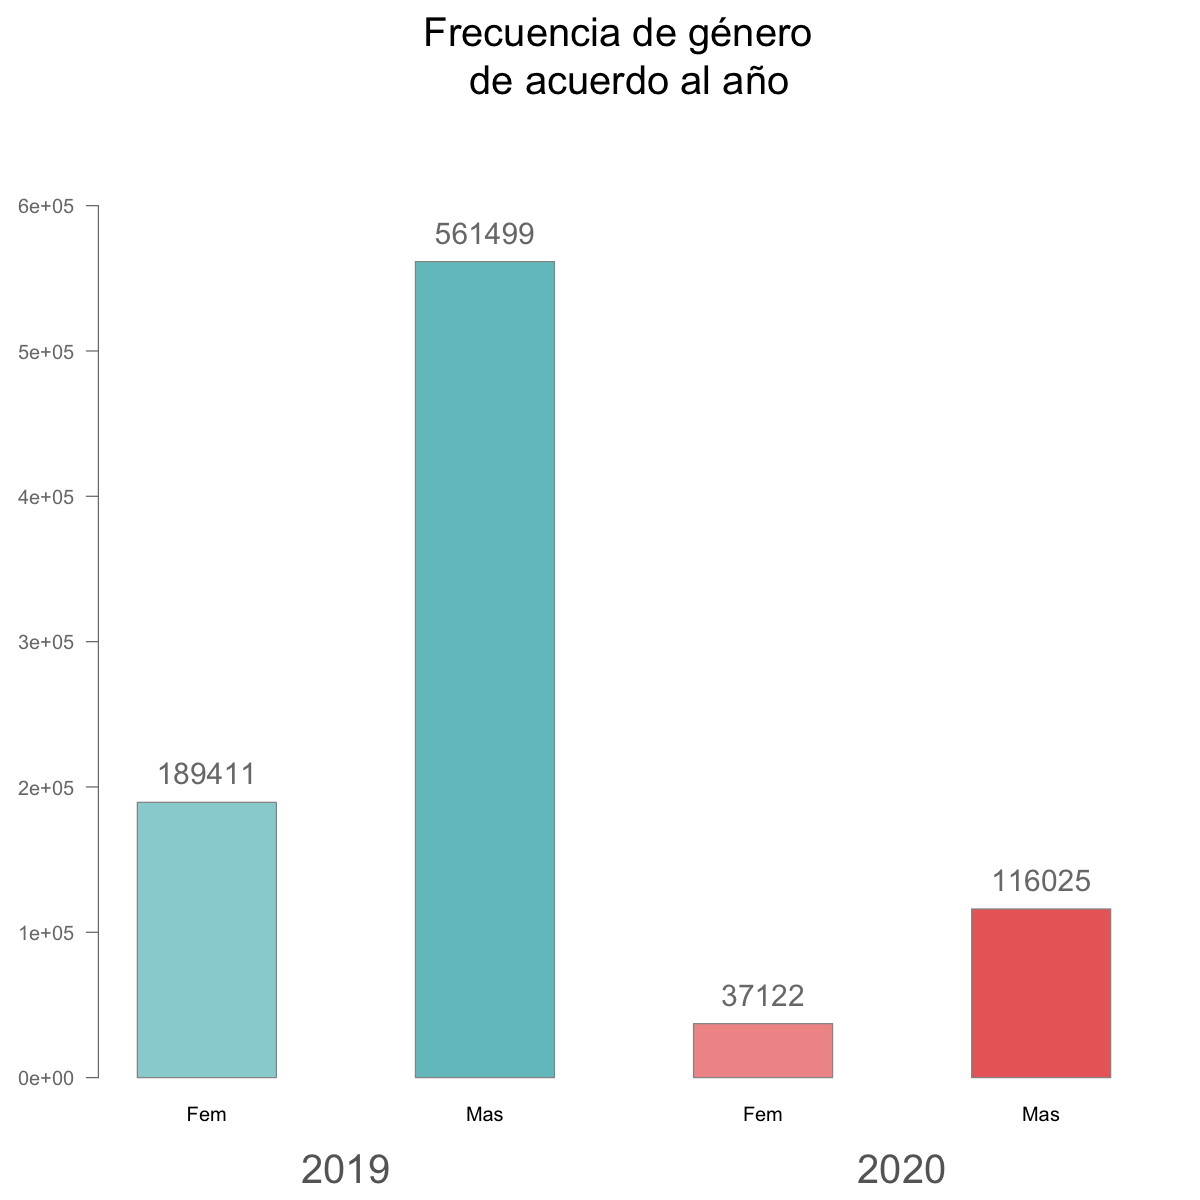

In [11]:
# Definimos algunos colores
rosa <- '#E95D59EE'
azul <- '#45B4B8CC'
gris <- '#969696FF'

# Graficamos
barplot(gen,axes=F,space = 1,ylim=c(0,gen[2]*1.2),
        col=c('#45B4B899',azul,'#E95D59AA',rosa), border=gris,
        names.arg=c('Fem','Mas','Fem','Mas'))
axis(2,las=2,col='gray48',col.axis='gray48')
text(1.5,gen[1]+20000,paste(gen[1]),cex=1.5,col='gray48')
text(3.5,gen[2]+20000,paste(gen[2]),cex=1.5,col='gray48')
text(5.5,gen[3]+20000,paste(gen[3]),cex=1.5,col='gray48')
text(7.5,gen[4]+20000,paste(gen[4]),cex=1.5,col='gray48')
mtext('Frecuencia de género \n de acuerdo al año',3, cex=2)
mtext('2019',1,at=2.5,padj = 3,cex=2,col='gray40')
mtext('2020',1,at=6.5,padj = 3,cex=2,col='gray40')

En este gráfico se observa que en general existe un uso mayor de los hombres tanto en el año 2019 como en el año 2020. Y también se observa que disminuyó de manera significativa los conteos de usuarios mujeres y hombres en el mes de mayo 2020.

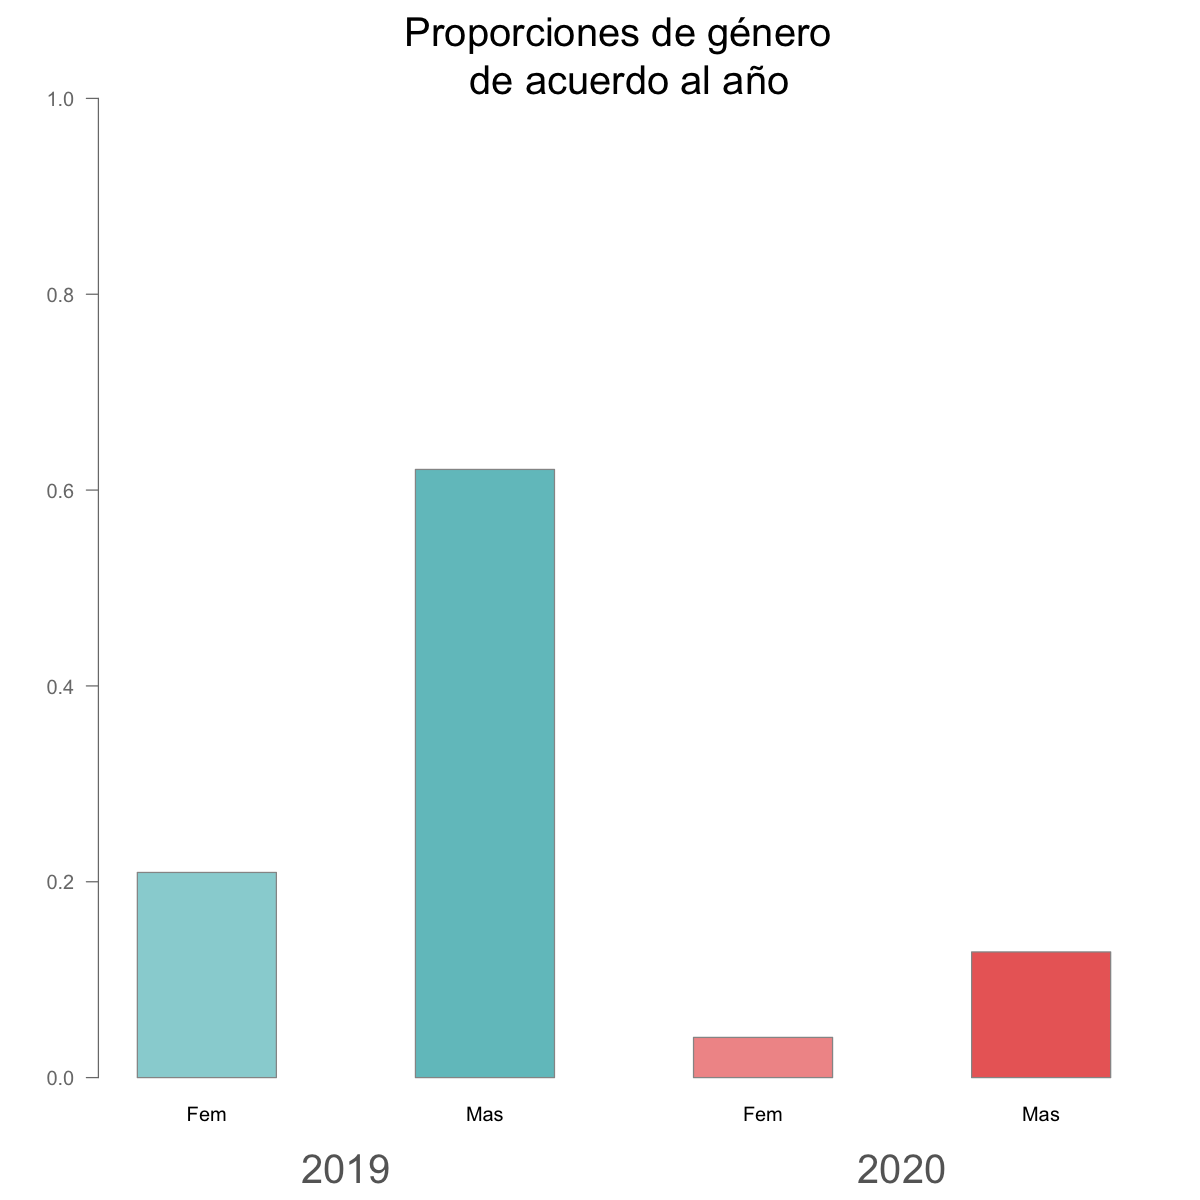

In [12]:
barplot(prop.table(gen),axes=F,space = 1,ylim=c(0,1),
        col=c('#45B4B899',azul,'#E95D59AA',rosa), border=gris,
        names.arg=c('Fem','Mas','Fem','Mas'))
axis(2,las=2,col='gray48',col.axis='gray48')
text(1.5,gen[1]+20000,paste(gen[1]),cex=1.5,col='gray48')
text(3.5,gen[2]+20000,paste(gen[2]),cex=1.5,col='gray48')
text(5.5,gen[3]+20000,paste(gen[3]),cex=1.5,col='gray48')
text(7.5,gen[4]+20000,paste(gen[4]),cex=1.5,col='gray48')
mtext('Proporciones de género \n de acuerdo al año',3, cex=2)
mtext('2019',1,at=2.5,padj = 3,cex=2,col='gray40')
mtext('2020',1,at=6.5,padj = 3,cex=2,col='gray40')

Este gráfico coloca las proporciones de usuarios del género femenino y masculino de ambas bases de datos. Aquí se confirma de nuevo que hubo una mayor proporción de usuarios hombres que utilizaron la bici en mayo 2019 y la disminución de uso en el 2020.

### Variable de edad del usuario.

A continuación se presenta un histograma de las edades de los usuarios que coloca en el mismo plano la información de las bases de mayo 2019 y 2020. Se observa que ambas son muy similares entre sí con respecto a la forma de su distribución, sin embargo, existe una disminución de alrededor de 3/4 en la frecuencia de la edad de los usuarios en el mes de mayo 2020. 

In [13]:
edad_19 <- may_19$Edad_Usuario
edad_20 <- may_20$Edad_Usuario

In [14]:
summary(edad_19)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   28.00   32.00   35.16   40.00   96.00 

In [15]:
summary(edad_20)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   29.00   34.00   36.79   43.00   87.00 

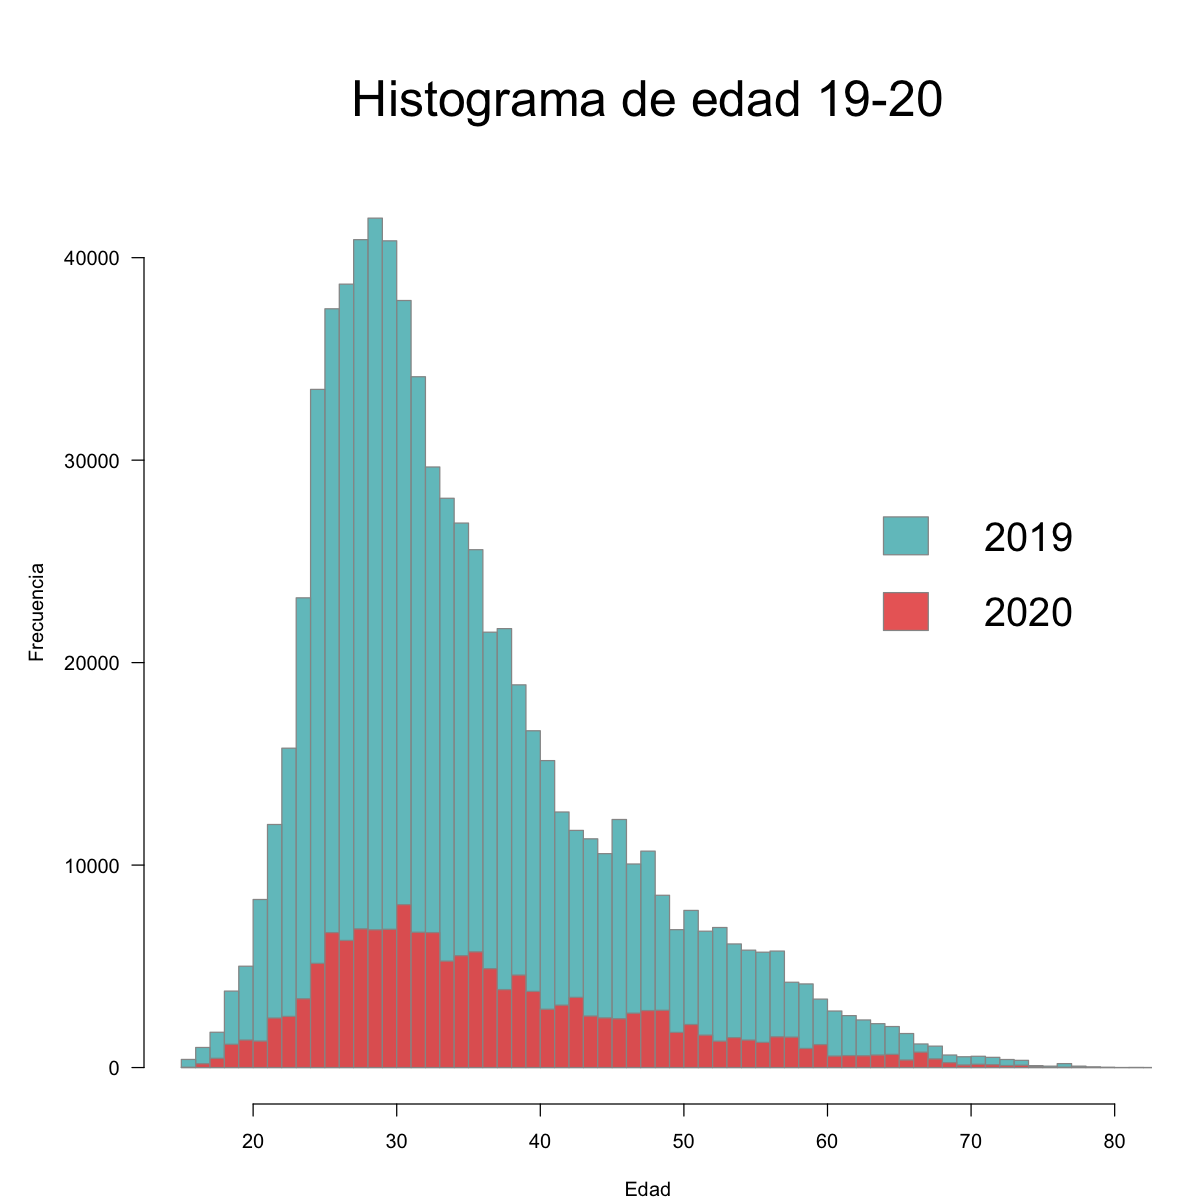

In [16]:
par(mar=c(4,6,5,2))
hist(edad_19,
     xlim=c(15,80),ylim=c(0,45000),axes=F,
     xlab='Edad',ylab='',main='',
     breaks=seq(15,100,1),
     col=azul,
     border=gris)
axis(1)
axis(2,las=2)
hist(edad_20,add=T,
     breaks=seq(15,100,1),
     col=rosa,
     border=gris)
mtext('Histograma de edad 19-20', 3, cex=2.5)
mtext('Frecuencia', 2, line=4)
legend(60,30000,legend = c(2019,2020),
       fill = c(azul,rosa),border=c(gris,gris),
       box.col='white',cex=2)

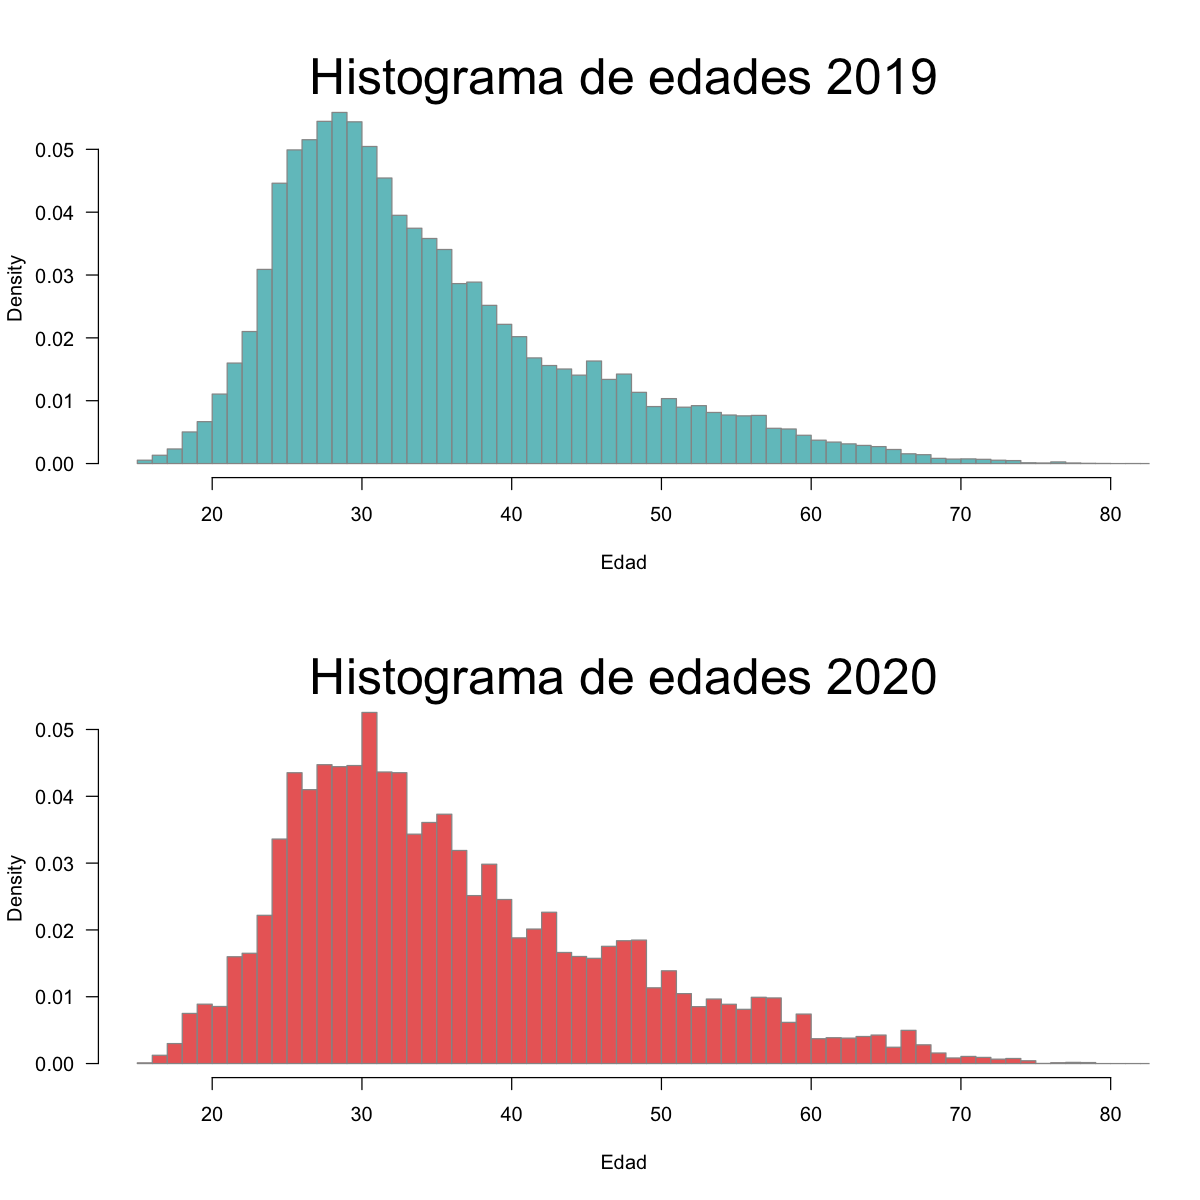

In [17]:
layout(1:2)

hist(edad_19,
     xlim=c(15,80),axes=F,
     xlab='Edad',main='',
     breaks=seq(15,100,1),
     col=azul,
     border=gris,freq=F)
axis(1)
axis(2,las=2)
mtext('Histograma de edades 2019', 3, cex=2.5)

hist(edad_20,xlim=c(15,80),
     breaks=seq(15,100,1),
     col=rosa,xlab='Edad',
     border=gris,main='',axes=F,freq=F)
mtext('Histograma de edades 2020', 3, cex=2.5)

axis(1)
axis(2,las=2)

Las última figura contiene unos los histogramas con las proporciones de la edades de ambos grupos. Se confirma que ambas distribuciones están concentradas en edades del rango 25 a 40 año. También se observa que ambas distribuciones están sesgadas a la izquierda, es decir, más usuarios jóvenes utilizaron ecobici. Sin embargo, la base de 2020 tiene un pico mucho más pronunciado en la edad de 30 y las edades alrededor de ésta, son más similares entre sí; mientras que las frecuencias en las edades de los usuarios de la base del 2019 tiene una disminución más suave con respecto a la edad más frecuente.

### Variable de cicloestaciones de retiro y arribo.

Recordemos que existen 480 estaciones, por lo que cualquier valor fuera de este rango se puede deber a errores de registro, por lo tanto filtramos los datos:

In [18]:
estaciones_20 <- may_20 %>% 
  filter(Ciclo_Estacion_Retiro <= 480) %>% 
  filter(Ciclo_Estacion_Arribo <= 480) %>% 
  select(Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo)

estaciones_19 <- may_19 %>% 
  filter(Ciclo_Estacion_Retiro <= 480) %>% 
  filter(Ciclo_Estacion_Arribo <= 480) %>% 
  select(Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo)

A continuación se presenta un histograma que coloca en un sólo gráfico las cicloestaciones más utilizadas, tanto para el retiro y arribo de las bases de mayo 2019 y mayo 2020. De manera general, se observa que las cicloestaciones del 1 al 80 son las más utilizadas, que de acuerdo al [mapa](https://www.ecobici.cdmx.gob.mx/sites/default/files/pdf/wp_2020_2_web_mapa_3.pdf), son las cicloestaciones localizadas en las colonias Condesa, Roma, Escandon, entre otras. También se observa que las cicloestaciones que tienen identificadores arriba de 200, disminuye su uso, que son las colonias menos céntricas. Esto con excepción de las cicloestaciones cercanas al 280, que parecen tener un mayor uso, incluso mayor que las cicloestaciones con identificadores del 1 al 80. 

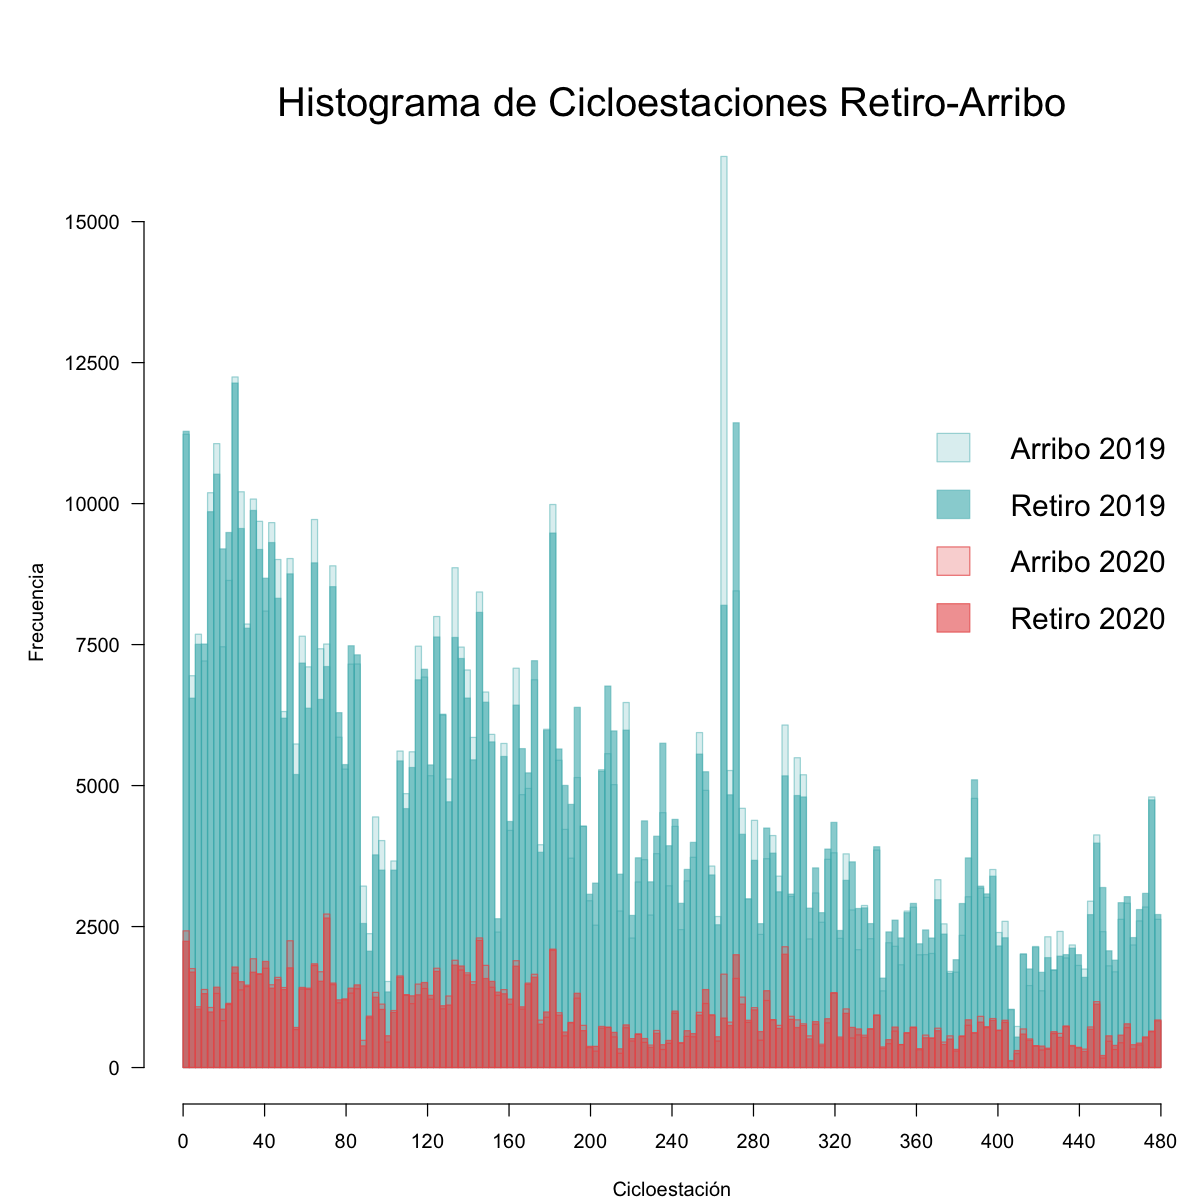

In [19]:
par(mar=c(4,6,5,0))
hist(estaciones_19[,2],col='#45B4B833',border='#45B4B877',
     breaks=seq(0,480,3),axes=F,xlab='Cicloestación',ylab='',main='')
axis(1,at=seq(0,480,40))
axis(2,las=2,at=seq(0,15000,2500))
mtext('Frecuencia', 2, line=4)
mtext('Histograma de Cicloestaciones Retiro-Arribo',3,cex=2)
hist(estaciones_19[,1],col='#45B4B899',border='#45B4B877',add=T,breaks=seq(0,480,3))
hist(estaciones_20[,2],add=T,col='#E95D5944',border='#E95D59BB',breaks=seq(0,480,3))
hist(estaciones_20[,1],add=T,col='#E95D5999',border='#E95D59BB',breaks=seq(0,480,3))
legend(350,12000,legend = c('Arribo 2019','Retiro 2019','Arribo 2020','Retiro 2020'),
       fill  = c('#45B4B833','#45B4B899','#E95D5944','#E95D5999'),
       border= c('#45B4B877','#45B4B877','#E95D59BB','#E95D59BB'),
       box.col='white',cex=1.5)

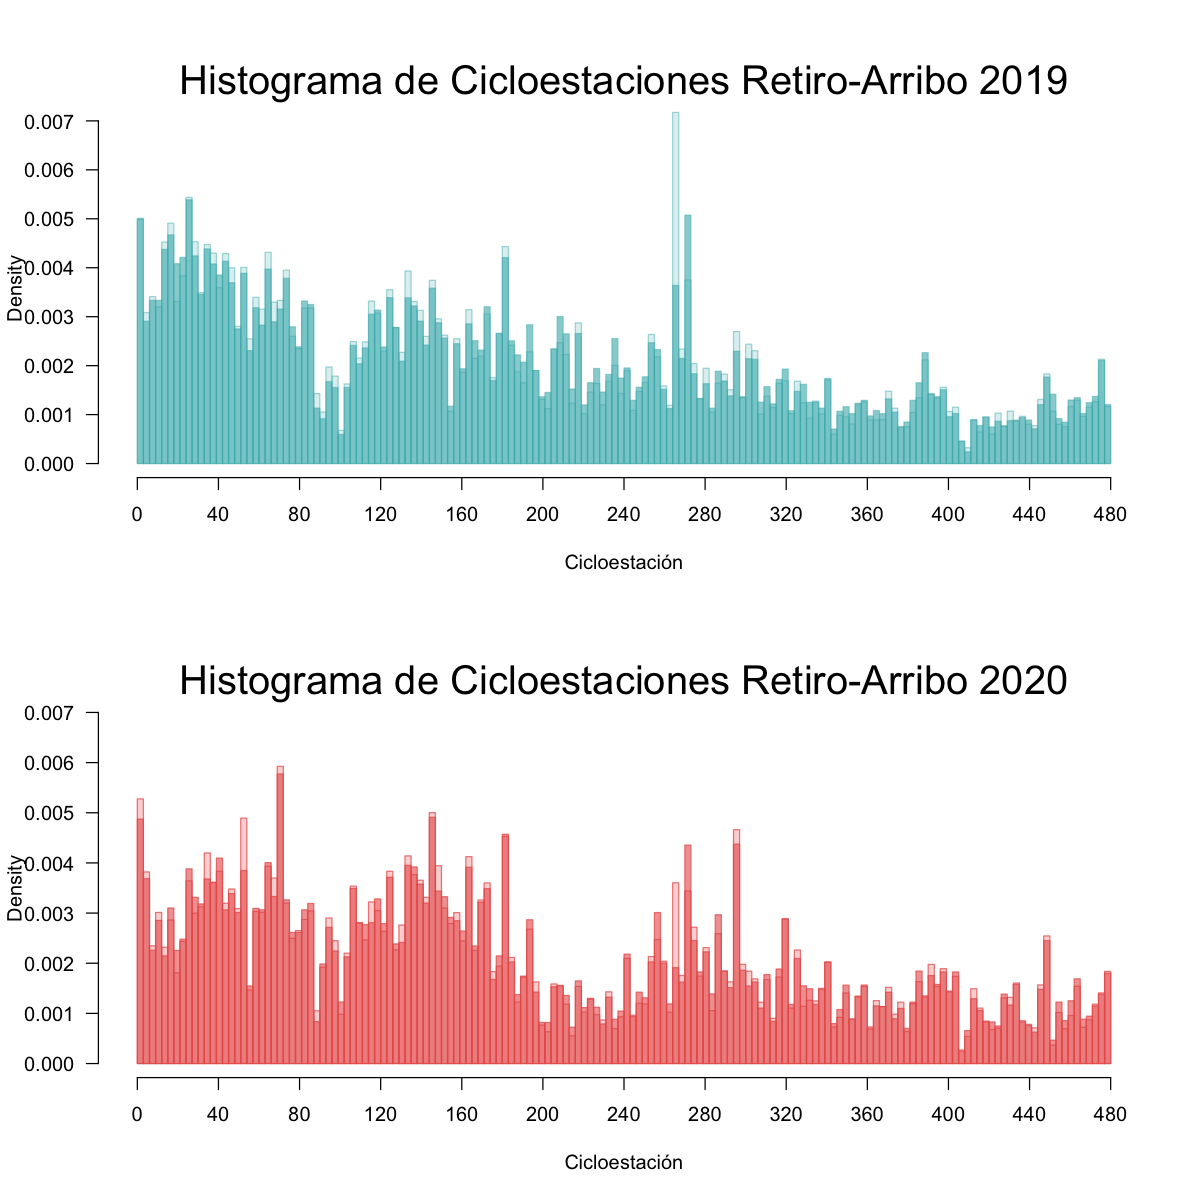

In [20]:
layout(1:2)
hist(estaciones_19[,2],col='#45B4B833',border='#45B4B877',
     breaks=seq(0,480,3),axes=F,xlab='Cicloestación',main='',freq=F)
axis(1,at=seq(0,480,40))
axis(2,las=2)
mtext('Histograma de Cicloestaciones Retiro-Arribo 2019',3,cex=2)
hist(estaciones_19[,1],col='#45B4B899',border='#45B4B877',add=T,breaks=seq(0,480,3),freq=F)

hist(estaciones_20[,2],xlim=c(0,480),freq=F,main='',xlab='Cicloestación',
     col='#E95D5944',border='#E95D59BB',breaks=seq(0,480,3),axes=F,ylim=c(0,0.007))
hist(estaciones_20[,1],add=T,freq=F,
     col='#E95D5999',border='#E95D59BB',breaks=seq(0,480,3))
mtext('Histograma de Cicloestaciones Retiro-Arribo 2020',3,cex=2)
axis(1,at=seq(0,480,40))
axis(2,las=2)

El último gráfico son unos histogramas que toman en cuenta la proporción de los retiros y arribos de ambas bases. De manera más puntual, se observa que la base del 2020 tiene una distribución un poco más uniforme con respecto al uso de cicloestaciones. Mientras que en la base del 2019 se observan grupos de cicloestaciones más utilizadas. 

### Variables de horarios de uso

Para poder graficar fácilmente las fechas, se convirtieron en variables numéricas que se separan en el día, el mes y el año.

In [21]:
# Separamos las variables Fecha_Retiro y Fecha Arribo
may_19_2 <- separate(may_19,Fecha_Retiro,
                   c('Dia_Re','Mes_Re','Anio_Re'))
may_19_2 <- separate(may_19_2,Fecha_Arribo,
                   c('Dia_Ar','Mes_Ar','Anio_Ar'))

# Las hacemos numéricas
may_19_2[,c(5,6,7,10,11,12)] <- sapply(may_19_2[,c(5,6,7,10,11,12)],as.numeric)

# Filtramos que sean sólo de mayo
may_19_2 <- may_19_2 %>% 
  filter(Mes_Re == 5)

In [23]:
# Separamos las variables Fecha_Retiro y Fecha Arribo
may_20_2 <- separate(may_20,Fecha_Retiro,
                   c('Dia_Re','Mes_Re','Anio_Re'))
may_20_2 <- separate(may_20_2,Fecha_Arribo,
                   c('Dia_Ar','Mes_Ar','Anio_Ar'))

# Las hacemos numéricas
may_20_2[,c(5,6,7,10,11,12)] <- sapply(may_20_2[,c(5,6,7,10,11,12)],as.numeric)

# Filtramos que sean sólo de mayo
may_20_2 <- may_20_2 %>% 
  filter(Mes_Re == 5)

In [24]:
cor(may_20_2$Dia_Ar,may_20_2$Dia_Re)

[1] 0.9999794

In [25]:
cor(may_19_2$Dia_Ar,may_19_2$Dia_Re)

[1] 0.9999843

En los siguientes gráficos se muestran los días de retiro de una bicicleta de ambos meses de mayo. Se decidió sólo graficar esta variable debido a que la información proporcionada por los días de arribo coincide casi siempre con los días de retiro. Además, la correlación entre ambas variables es muy alta.

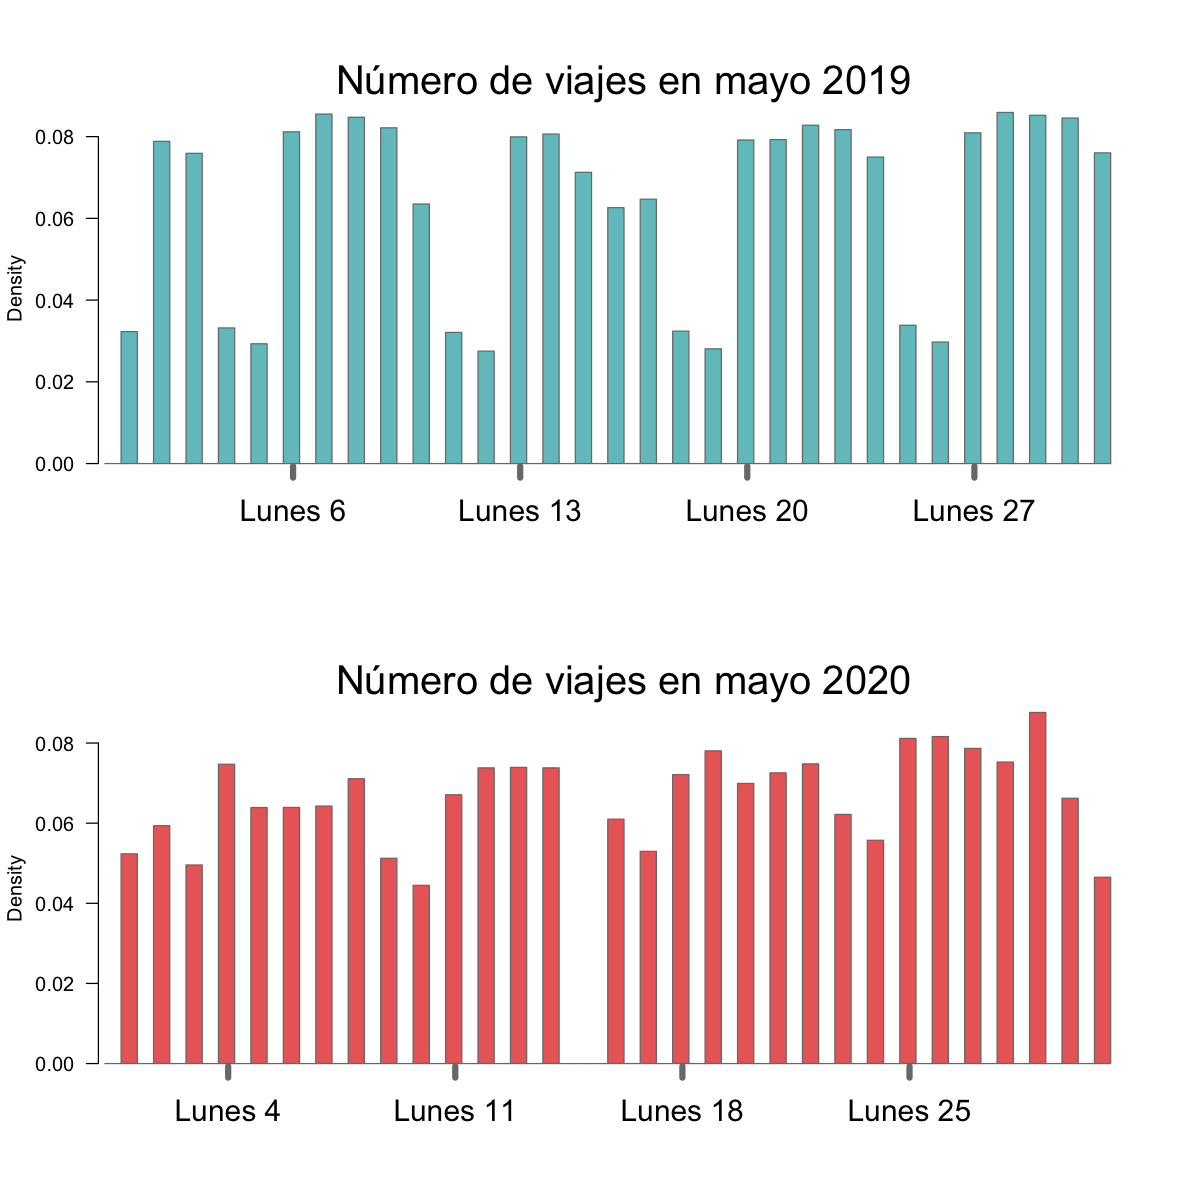

In [34]:
dias_sem <- c('M','V', rep(c('L','M',''),4))
layout(1:2)
hist(may_19_2$Dia_Re,col=azul,border='gray48',breaks=seq(0,31,0.5),freq=F,
     axes=F,xlab='',main='',xlim=c(1,31))
axis(1,at=seq(5.8,31,7),col='white',col.ticks='gray48',cex.axis=1.5,
     labels=c('Lunes 6', 'Lunes 13','Lunes 20','Lunes 27'),lwd.tick=5,tck=0.03)
axis(2,las=2)
mtext('Número de viajes en mayo 2019',cex=2)

hist(may_20_2$Dia_Re,col=rosa,border='gray48',breaks=seq(0,31,0.5),
     axes=F,xlab='',main='',xlim=c(1,31),freq=F)
axis(1,at=seq(3.8,31,7),col='white',col.ticks='gray48',cex.axis=1.5,
     labels=c('Lunes 4', 'Lunes 11','Lunes 18','Lunes 25'),lwd.tick=5,tck=0.03)
axis(2,las=2)
mtext('Número de viajes en mayo 2020',cex=2)

En el gráfico del número de viajes en mayo 2019 se observan ciclos donde el uso de la ECOBICI se incrementa en los días hábiles de la semana, y los fines de semana disminuye a casi la mitad de viajes. Esto contrasta con el número de viajes en mayo 2020 pues se observa una distribución más uniforme en los números de viaje independiente del día de la semana. Esto sugiere que el este sistema de ECOBICI se utiliza para asistir al trabajo o a la escuela, pues debido a la pandemia la gente dejó de asistir a dichas actividades cotidianas y se observa en un uso más uniforme a través de los días de la semana.

Por último, se exploran lo horarios del uso de la bicicleta, para los cuales creamos las siguientes bases.

In [27]:
horario_19 <- data.frame('dia_r'=may_19_2$Dia_Re,
                         'dia_a'=may_19_2$Dia_Ar,
                         'hora_r'=hour(hms(as.character(may_19_2$Hora_Retiro))),
                         'hora_a'=hour(hms(as.character(may_19_2$Hora_Arribo))))

horario_20 <- data.frame('dia_r'=may_20_2$Dia_Re,
                         'dia_a'=may_20_2$Dia_Ar,
                         'hora_r'=hour(hm(as.character(may_20_2$Hora_retiro))),
                         'hora_a'=hour(hm(as.character(may_20_2$Hora_Arribo))))

In [28]:
cor(horario_19$hora_r,horario_19$hora_a)

[1] 0.9742475

In [29]:
cor(horario_20$hora_r,horario_20$hora_a)

[1] 0.9707199

Revisamos la correlación entre las variables de hora de retiro y hora de arribo, que parece ser muy alta entre ambas. Por lo tanto, graficaremos sólo la variable de horario de retiro y día de retiro.

In [30]:
hola_19 <- horario_19 %>% group_by(hora_r,dia_r) %>% tally()

In [32]:
hola_20 <- horario_20 %>% group_by(hora_r,dia_r) %>% tally()

In [68]:
p1 <-ggplot(hola_19,aes(dia_r,hora_r,fill=n))+
  geom_tile(color= "white",size=0.1) + 
  scale_fill_viridis(name="Frecuencia de Uso",option ="C")
p1 <-p1 + scale_y_continuous(trans = "reverse", breaks = seq(0,23,1))
p1 <-p1 + scale_x_continuous(breaks =seq(1,31,1))
p1 <-p1 + theme_minimal(base_size = 8)
p1 <-p1 + labs(title= paste("Horarios Mayo 19"), x="Día", y="Hora")
p1 <-p1 + theme(legend.position = "bottom")+
  theme(plot.title=element_text(size = 26))+
  theme(axis.text.y=element_text(size=12)) +
  theme(axis.title.y=element_text(size=20)) +
  theme(axis.title.x=element_text(size=20)) +
  theme(strip.background = element_rect(colour="white"))+
  theme(plot.title=element_text(hjust=0))+
  theme(axis.ticks=element_blank())+
  theme(axis.text=element_text(size=12))+  
  theme(legend.title=element_text(size=13))+
  theme(legend.text=element_text(size=10))+
  removeGrid()#ggExtra

In [69]:
p2 <-ggplot(hola_20,aes(dia_r,hora_r,fill=n))+
  geom_tile(color= "white",size=0.1) + 
  scale_fill_viridis(name="Frecuencia de Uso",option ="C")
#p <-p + facet_grid(dia_r~hora_r)
p2 <-p2 + scale_y_continuous(trans = "reverse", breaks = seq(0,23,1))
p2 <-p2 + scale_x_continuous(breaks =seq(1,31,1))
p2 <-p2 + theme_minimal(base_size = 8)
p2 <-p2 + labs(title= paste("Horarios Mayo 20"), x="Día", y="Hora")
p2 <-p2 + theme(legend.position = "bottom")+
  theme(plot.title=element_text(size = 26))+
  theme(axis.text.y=element_text(size=12)) +
  theme(axis.title.y=element_text(size=20)) +
  theme(axis.title.x=element_text(size=20)) +
  theme(strip.background = element_rect(colour="white"))+
  theme(plot.title=element_text(hjust=0))+
  theme(axis.ticks=element_blank())+
  theme(axis.text=element_text(size=12))+  
  theme(legend.title=element_text(size=13))+
  theme(legend.text=element_text(size=10))+
  removeGrid()#ggExtra

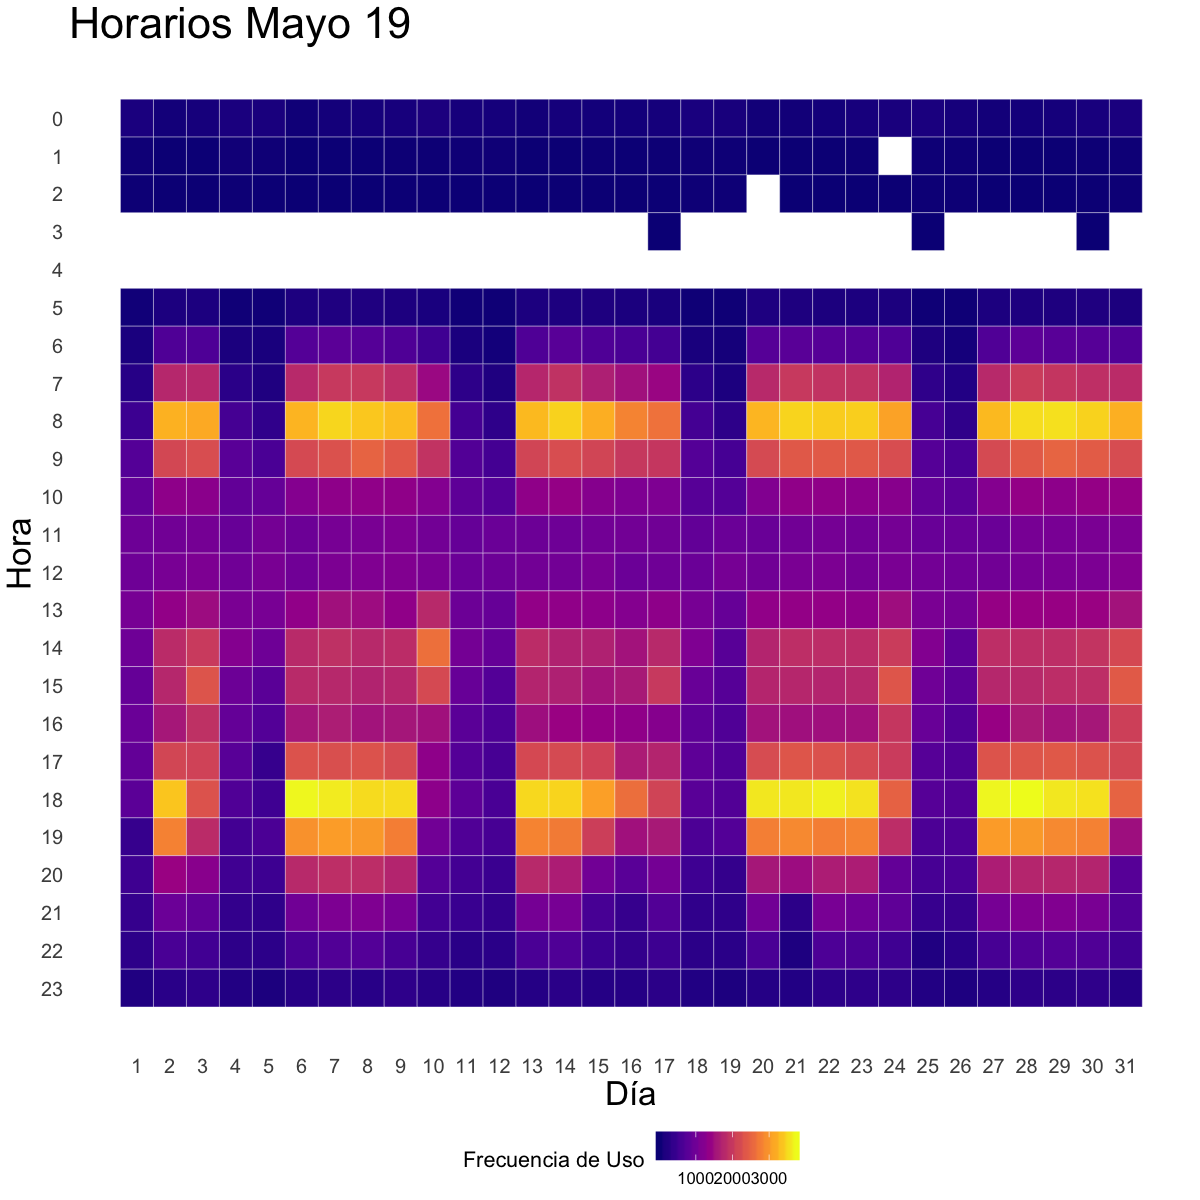

In [70]:
p1

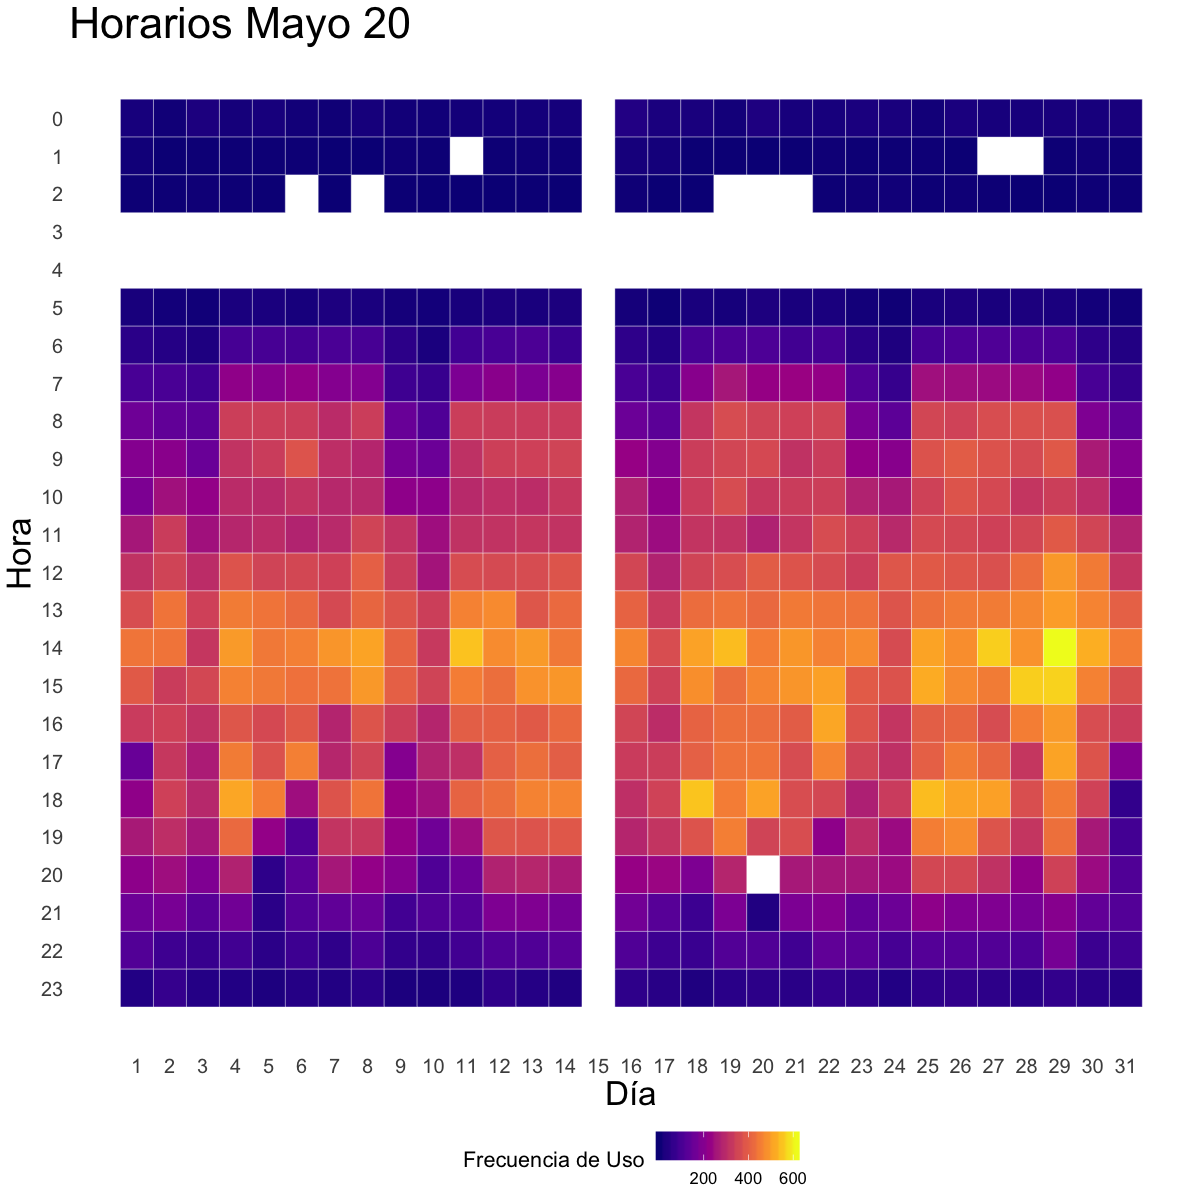

In [71]:
p2

Los gráficos anteriores son muy informativos para observar el cambio de horarios entre los meses de mayo 2019 y mayo 2020. Para la base de mayo de 2019 se observa el ciclo de lunes a viernes antes comentado. Además, las horas más comunes entre semana eran entre 8 y 9 de la mañana y a las 6 y 7 de la tarde, que coinciden con los horarios de oficina de muchas empresas. Para los otros horarios durante el día, disminuye a casi la mitad el número de viajes hechos en ecobici. Esto es muy contrastante con la figura de los horarios de mayo 2020 pues en ésta, no se pueden apreciar patrones ni de horas ni día tan claramente. Lo que se puede apreciar más fácilmente es que el horario más usado durante la pandemia es a medio día y comenzando la tarde. Cabe mencionar que en la base de mayo 2020, no hubieron registros del día 15 de mayo. 

En resumen del análisis explorario y/o descriptivo de la base de datos de Ecobici de los meses de mayo 2020 y mayo 2019, se puede decir puntualizar que:

- En general, más hombres utilizan el sistema de Ecobici como medio de transporte.
- Más jóvenes de edades entre 25 y 40 años usan Ecobici.
- Existen cicloestaciones de uso más frecuente, que parecen estar localizadas en lugares cercanos a zonas de trabajo.
- El sistema de transporte de Ecobici parece ser utilizado como medio de transporte a la oficina, pues los datos mostraron horarios de uso que coinciden con los horarios de oficina más común.
- Hubo una disminución significativa en el uso de Ecobici debido a la actual contingencia, esto se reflejó tanto el número de viajes como los horarios de uso.

A partir de esta información, surgieron más preguntas sobre el uso de ecobici. Específicamente, sobre cuáles son las cicloestaciones de arribo y retiro más frecuentes, existen algunas rutas de viaje más usadas, y si cambio la duración de los viajes entre las bases estudiadas. Dichas preguntas se presentarán detalladamente en el siguiente capítulo.

## Capítulo 2. Análisis de rutas y tiempo de viajes

In [2]:
#packages
library(dplyr)
library(ggplot2)
library(chron)
library(gmodels)
library(gridExtra)
library(IRdisplay)
library(dgof)
library(MASS)

### Lectura de datos y obtención de la duración de viaje

Debido a que los tiempos de retiro y arribo de bicicletas en la base de Mayo 2020 no incluyen los segundos, sino únicamente la hora y los minutos, mientras que en la base de Mayo 2019 se encuentra la información completa, se definió conservar únicamente las horas y minutos, y hacer los segundos iguales a cero en ambos casos. 

La imputación no es una opción, ya que toda la base de 2020 presenta este tipo de información incompleta.

Para el cálculo de la duración de viajes, fueron considerados únicamente los viajes que comenzaron y finalizaron el mismo día. Esta duración se reporta en minutos.

Se consideran cuatro tablas: `Mayo19` y `Mayo20`con el total de viajes para Mayo 2019 y 2020, y `Mayo19_filt` y `Mayo20_filt`  únicamente con los viajes de 45 minutos o menos.

In [9]:
#lectura de bases
Mayo19 = read.csv('Mayo19.csv') %>% mutate_if(is.factor,as.character)
Mayo20 = read.csv('Mayo20.csv') %>% mutate_if(is.factor,as.character)
colnames(Mayo20)[6]="Hora_Retiro"

#arreglo de tiempos
Mayo19$Hora_Retiro = substr(Mayo19$Hora_Retiro,1,5)
Mayo19$Hora_Arribo = substr(Mayo19$Hora_Arribo,1,5)
Mayo19$Hora_Retiro = paste(Mayo19$Hora_Retiro,":00",sep="")
Mayo19$Hora_Arribo = paste(Mayo19$Hora_Arribo,":00",sep="")
Mayo20$Hora_Retiro = paste(Mayo20$Hora_Retiro,":00",sep="")
Mayo20$Hora_Arribo = paste(Mayo20$Hora_Arribo,":00",sep="")

#formateo de tiempos
Mayo19$Hora_Arribo=chron(times=Mayo19$Hora_Arribo)
Mayo19$Hora_Retiro=chron(times=Mayo19$Hora_Retiro)
Mayo20$Hora_Arribo=chron(times=Mayo20$Hora_Arribo)
Mayo20$Hora_Retiro=chron(times=Mayo20$Hora_Retiro)

#conservar solo viajes comenzados y finalizados el mismo día (los casos en los que esto no ocurre presentan en muchos casos duraciones atipicas de hasta varios días)
Mayo19 = Mayo19 %>% filter(Fecha_Retiro == Fecha_Arribo,Ciclo_Estacion_Retiro<=480, Ciclo_Estacion_Arribo<=480)
Mayo20 = Mayo20 %>% filter(Fecha_Retiro == Fecha_Arribo,Ciclo_Estacion_Retiro<=480, Ciclo_Estacion_Arribo<=480)

#Duracion de viaje
Mayo19$Duracion = Mayo19$Hora_Arribo-Mayo19$Hora_Retiro
Mayo20$Duracion = Mayo20$Hora_Arribo-Mayo20$Hora_Retiro

#checar excedencias en el tiempo de viaje (mas de 45 mins)
Mayo19 = Mayo19 %>% mutate(Excedencia=ifelse((hours(Duracion)==0 & minutes(Duracion)<=45) | (hours(Duracion)==0 & (minutes(Duracion)+seconds(Duracion)/60<=45)),"NO","SI"))
Mayo20 = Mayo20 %>% mutate(Excedencia=ifelse((hours(Duracion)==0 & minutes(Duracion)<=45) | (hours(Duracion)==0 & (minutes(Duracion)+seconds(Duracion)/60<=45)),"NO","SI"))

#filtrar aquellos que no exceden los 45 mins permitidos
Mayo19_filt = Mayo19 %>% filter(Excedencia=="NO")
Mayo20_filt = Mayo20 %>% filter(Excedencia=="NO")

#pasar duracion a minutos
Mayo19 = Mayo19 %>% mutate(Duracion =  60*hours(Duracion) + minutes(Duracion))
Mayo20 = Mayo20 %>% mutate(Duracion =  60*hours(Duracion) + minutes(Duracion))
Mayo19_filt = Mayo19_filt %>% mutate(Duracion = minutes(Duracion))
Mayo20_filt = Mayo20_filt %>% mutate(Duracion = minutes(Duracion))

### Estaciones

Las estaciones de ECOBICI se identifican a través de números enteros, que van desde 1 hasta 480. El mapa y listado de cicloestaciones pueden consultarse en el siguiente [link](https://www.ecobici.cdmx.gob.mx/es/mapa-de-cicloestaciones).

Las bases utilizadas en este proyecto contienen información sobre la estación de retiro y arribo para cada uno de los viajes realizados.

Si bien el número de cicloestación funge únicamente como un identificador, visualizar los histogramas reporcentuados de las distintas cicloestaciones de retiro y arribo mostrados en la sección anterior, y compararlos en el tiempo, puede arrojar evidencias gráficas de cambios en la movilidad.

Anualmente, el comportamiento general de los histogramas de retiro y arribo de biciletas por estación parece ser similar. Por otro lado, comparando los histogramas correspondientes a Mayo 2019 y Mayo 2020, se aprecian algunos cambios, unos más evidentes que otros. Por ejemplo, se tiene que en Mayo 2020 existe un incremento en la proporción de viajes realizados partiendo de y llegando a varias de las estaciones con numeración superior a 90 e inferior a 200, que se encuentran que zonas como la Roma, la colonia Juárez y Escandón.

Se incluyen algunas imágenes tomadas de `Google maps` con la finalidad de visualizar algunas de las estaciones y sus respectivas localizaciones en la ciudad.

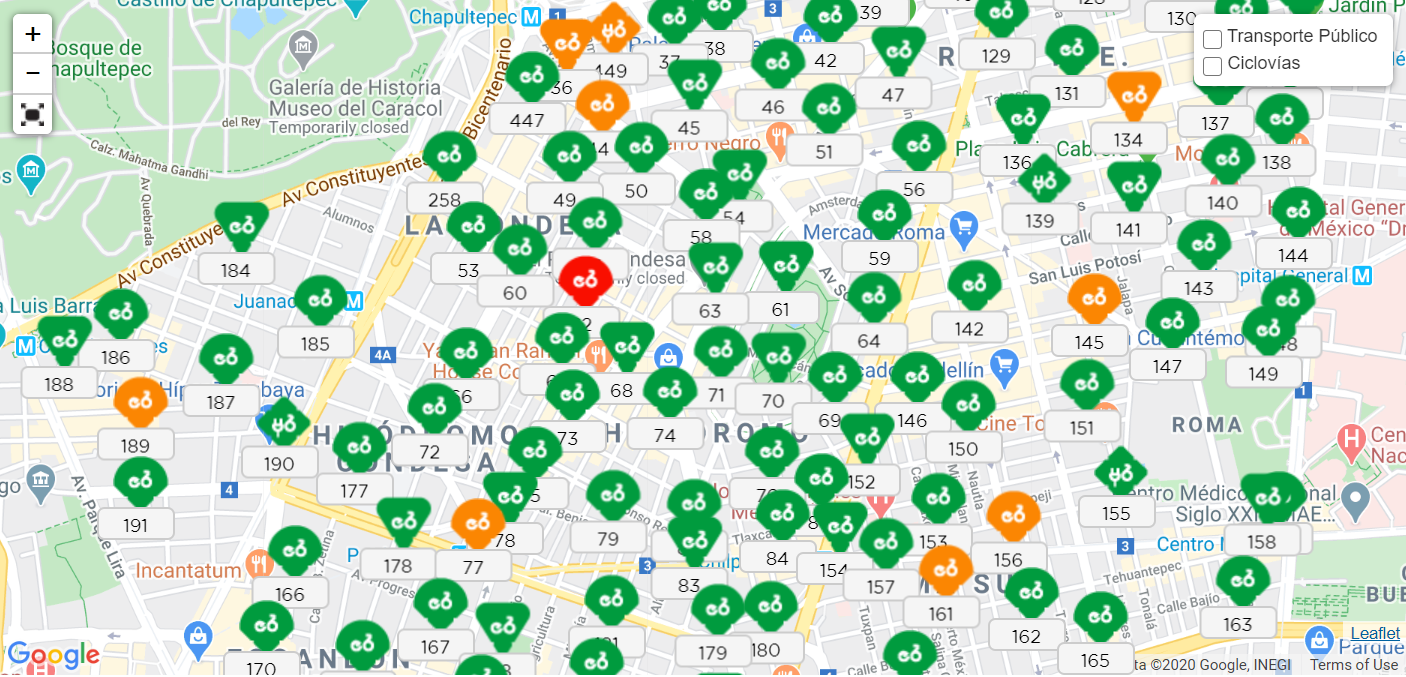

In [14]:
display_png(file="roma.png")

Se tiene también un marcado descenso en la proporción de viajes que inician o finalizan en las estaciones numeradas entre 200 y 250 aproximadamente, rango correspondiente a colonias como Polanco y Anzures.

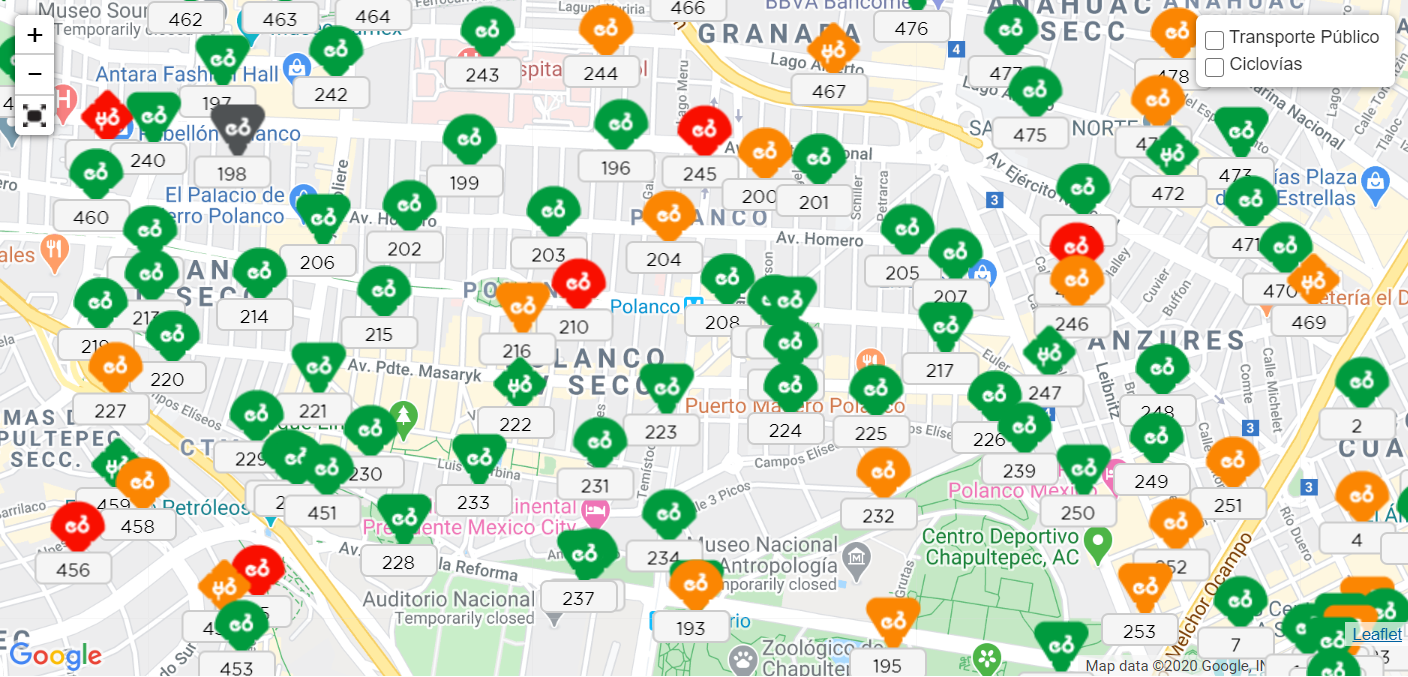

In [15]:
display_png(file="polanco.png") 

A continuación se presentan las cinco cicloestaciones donde se retiraron y donde arribaron más bicicletas en Mayo 2019 y Mayo 2020, así como una tabla que relaciona la numericación con la ubicación de las cicloestaciones más frecuentes.

In [12]:
Mayo_filt = rbind(Mayo19_filt,Mayo20_filt) %>% mutate(Anio = substr(Fecha_Retiro,7,10))

count_retiro_t5 = Mayo_filt %>% group_by(Anio,Ciclo_Estacion_Retiro) %>% summarise(Freq_Retiro=n(),.groups = "drop") %>% group_by(Anio) %>% top_n(n = 5, wt = Freq_Retiro) %>% arrange(desc(Freq_Retiro))
count_arribo_t5 = Mayo_filt %>% group_by(Anio,Ciclo_Estacion_Arribo) %>% summarise(Freq_Arribo=n(),.groups = "drop") %>% group_by(Anio) %>% top_n(n = 5, wt = Freq_Arribo) %>% arrange(desc(Freq_Arribo))
count_t5=cbind(count_retiro_t5,count_arribo_t5[,-1])
count_t5

Anio Ciclo_Estacion_Retiro Freq_Retiro Ciclo_Estacion_Arribo Freq_Arribo
1  2019 271                   7693        266                   8278       
2  2019   1                   6729          1                   7058       
3  2019  27                   6282         27                   6503       
4  2019 266                   5353        267                   6463       
5  2019 182                   4954        182                   5408       
6  2020 271                   1369          1                   1594       
7  2020   1                   1360        266                   1233       
8  2020  71                   1048        271                   1128       
9  2020 182                   1026        145                   1066       
10 2020 145                    992         71                   1055

In [13]:
df=data.frame(Ciclo_Estacion = unique(c(count_retiro_t5$Ciclo_Estacion_Retiro,count_arribo_t5$Ciclo_Estacion_Arribo))) %>% arrange(Ciclo_Estacion)
df$Ubicacion = c("RIO SENA-RIO BALSAS","REFORMA-HAVRE","AMSTERDAM-MICHOACAN","EJE 2 SUR YUCATÁN-CHIAPAS","PROGRESO-ASTRONOMOS","AV. JESÚS GARCIA-CARLOS J. MENESES","AV. JESÜS GARCÏA-CARLOS J. MENESES","AV. CENTRAL-J. MENESES")
df

Ciclo_Estacion Ubicacion                         
1   1            RIO SENA-RIO BALSAS               
2  27            REFORMA-HAVRE                     
3  71            AMSTERDAM-MICHOACAN               
4 145            EJE 2 SUR YUCATÁN-CHIAPAS         
5 182            PROGRESO-ASTRONOMOS               
6 266            AV. JESÚS GARCIA-CARLOS J. MENESES
7 267            AV. JESÜS GARCÏA-CARLOS J. MENESES
8 271            AV. CENTRAL-J. MENESES

Las cicloestaciones 1, 182, 266 y 271 permanecen entre las más usadas en ambos años. La estación 27, localizada en el corazón de la avenida Reforma, dejó de ser de las más frecuentemente utilizadas. Por otro lado, estaciones como la 71 y 145, respecticamente en las colonias Condesa y Roma, fueron de las más visitadas tanto como punto de inicio y de término de viaje en 2020, pero no en 2019.

De acuerdo al mapa, las estaciones 266, 267 y 271 se encuentran a poco metros de distancia una de otra, y son algunas de aquellas que se encuentran más al norte de la CMDX. Adicionalmente, se localizan una cuadra de Insurgentes Norte y de Forum Buenavista, estando cerca de medios de transporte público tales como el metrobús, el tren suburbano, y las estaciones de metro Revolución y Guerrero.

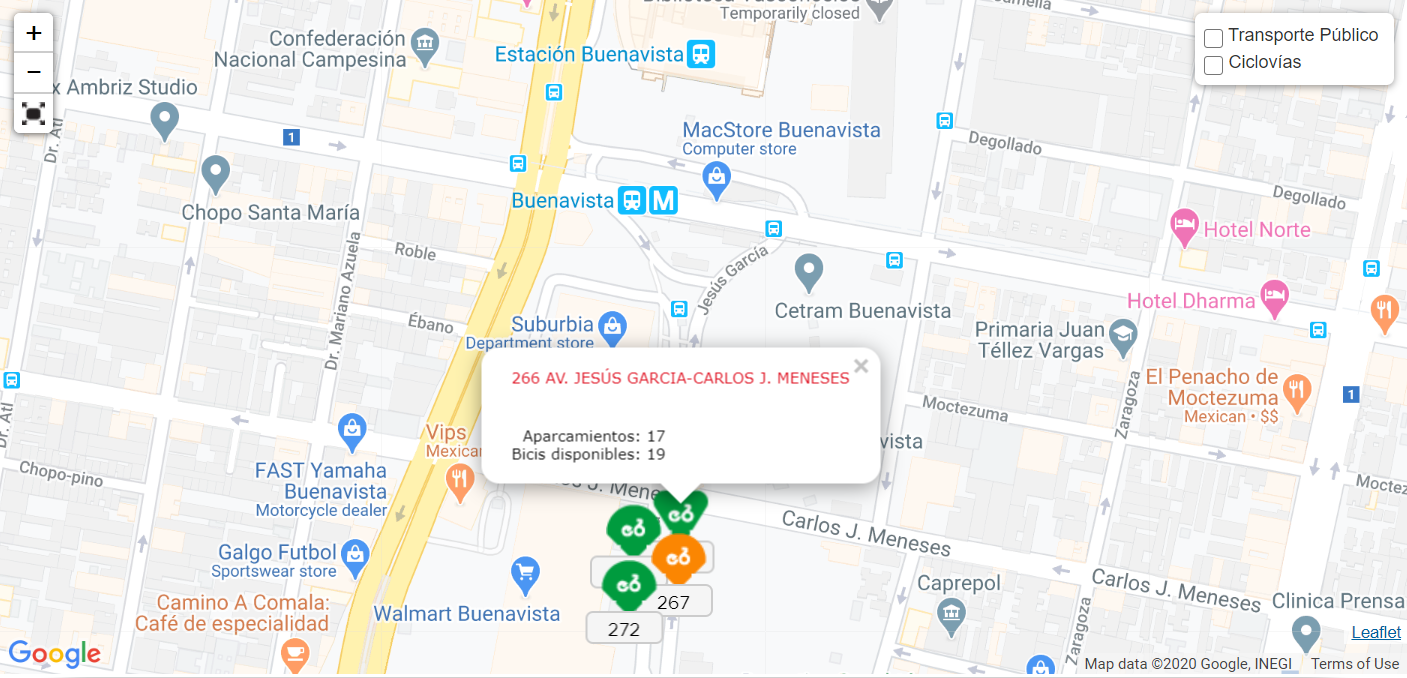

In [16]:
display_png(file="buenavista.png") 

En la tabla siguiente se comparan de forma separada las frequencias de las estaciones 71 y 145, y de las estaciones 1, 27, 182, 266, 267 y 271, en Mayo 2019 y Mayo 2020.

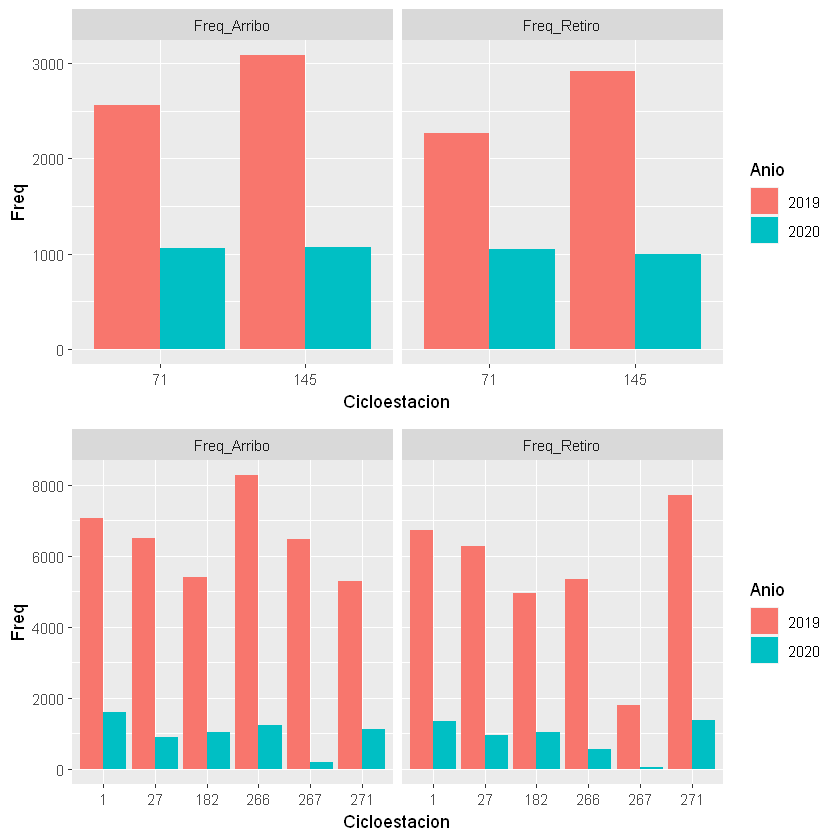

In [17]:
count_retiro = Mayo_filt %>% group_by(Anio,Ciclo_Estacion_Retiro) %>% summarise(Freq_Retiro=n(),.groups = "drop") 
count_arribo = Mayo_filt %>% group_by(Anio,Ciclo_Estacion_Arribo) %>% summarise(Freq_Arribo=n(),.groups = "drop") 
count1 = count_retiro[which(count_retiro$Ciclo_Estacion_Retiro %in% c(71,145)),]
count2 = count_arribo[which(count_arribo$Ciclo_Estacion_Arribo %in% c(71,145)),]
count=cbind(count1,count2[,-1])[,-4] %>% rename(Ciclo_Estacion = Ciclo_Estacion_Retiro)
count$i=1:4
count$Ciclo_Estacion = as.factor(count$Ciclo_Estacion)
p1=reshape(data = count,varying = c("Freq_Retiro","Freq_Arribo"),direction="long",v.name=c("value"),times=c("Freq_Retiro","Freq_Arribo"),idvar="i" ) %>%
ggplot(aes(fill=Anio, y=value, x=Ciclo_Estacion)) + 
    geom_bar(position="dodge", stat="identity") + facet_wrap(~time) + xlab("Cicloestacion") + ylab("Freq")

count_retiro = Mayo_filt %>% group_by(Anio,Ciclo_Estacion_Retiro) %>% summarise(Freq_Retiro=n(),.groups = "drop") 
count_arribo = Mayo_filt %>% group_by(Anio,Ciclo_Estacion_Arribo) %>% summarise(Freq_Arribo=n(),.groups = "drop") 
count1 = count_retiro[which(count_retiro$Ciclo_Estacion_Retiro %in% c(1,27, 182, 266, 267, 271)),]
count2 = count_arribo[which(count_arribo$Ciclo_Estacion_Arribo %in% c(1,27, 182, 266, 267, 271)),]
count=cbind(count1,count2[,-1])[,-4] %>% rename(Ciclo_Estacion = Ciclo_Estacion_Retiro)
count$i=1:12
count$Ciclo_Estacion = as.factor(count$Ciclo_Estacion)
p2=reshape(data = count,varying = c("Freq_Retiro","Freq_Arribo"),direction="long",v.name=c("value"),times=c("Freq_Retiro","Freq_Arribo"),idvar="i" ) %>%
ggplot(aes(fill=Anio, y=value, x=Ciclo_Estacion)) + 
    geom_bar(position="dodge", stat="identity") + facet_wrap(~time) + xlab("Cicloestacion") + ylab("Freq") 

grid.arrange(p1,p2,ncol=1)

Mientras que las estaciones 71 y 145 experimentaron reducciones de entre un 50% y 65% en las frecuencias de uso tanto en retiros como en arribos, las estaciones 1, 27, 182, 266, 267 y 271 presentaron disminuciones mucho mayores.

Resulta también de interés identificar si se presentan variaciones en la distribución del uso de estaciones de retiro y arribo en distintos grupos de edad y genero, considerando las observaciones de ambos años.

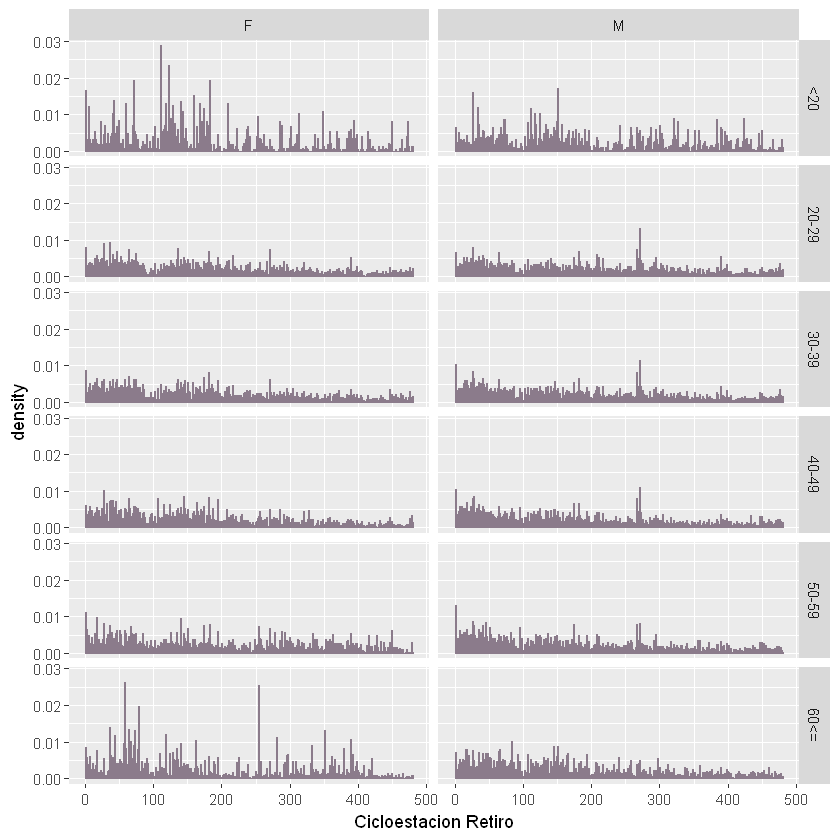

In [19]:
retiro_plot_all = Mayo_filt %>% mutate(Edad=ifelse(Edad_Usuario<20,"<20",ifelse(Edad_Usuario<30,"20-29",ifelse(Edad_Usuario<40,"30-39",ifelse(Edad_Usuario<50,"40-49",ifelse(Edad_Usuario<60,"50-59","60<=")))))) %>% ggplot() + geom_histogram(aes(x=Ciclo_Estacion_Retiro,y=..density..),binwidth = 1,colour="thistle4") + xlab("Cicloestacion Retiro") + facet_grid(Edad~Genero_Usuario)
retiro_plot_all

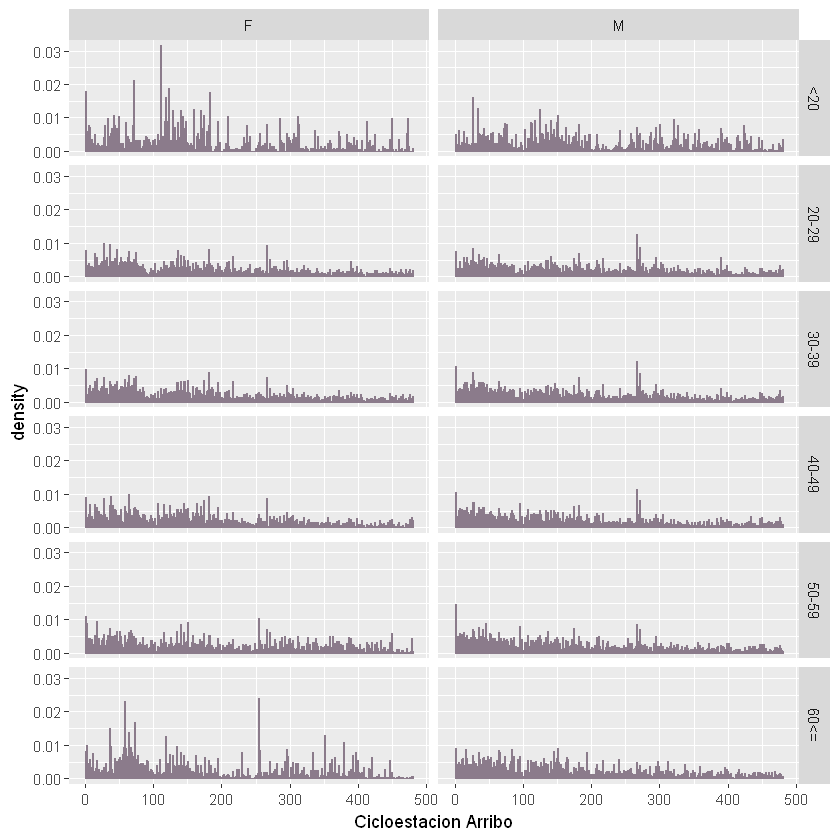

In [20]:
arribo_plot_all = Mayo_filt %>% mutate(Edad=ifelse(Edad_Usuario<20,"<20",ifelse(Edad_Usuario<30,"20-29",ifelse(Edad_Usuario<40,"30-39",ifelse(Edad_Usuario<50,"40-49",ifelse(Edad_Usuario<60,"50-59","60<=")))))) %>% ggplot() + geom_histogram(aes(x=Ciclo_Estacion_Arribo,y=..density..),binwidth = 1,colour="thistle4") + xlab("Cicloestacion Arribo") + facet_grid(Edad~Genero_Usuario)
arribo_plot_all

Los histogramas por grupos muestran marcadas diferencias en el uso de estaciones tanto de retiro como de arribo, al variar el género y en distintos grupos de edad. La diferencia es más notoria entre grupos de edades menores a 20 años, entre 20 y 59 años, y mayores a 60 años.

### Rutas

Cada pareja de números determinada por una cicloestación de retiro y una de arribo, representa una ruta recorrida. Existen registros de usuarios cuya estacion de retiro y arribo son la misma, lo cual casi siempre se relaciona con una duración de viaje extremadamente corto, dado que el usuario muy probablemente regresó la bicicleta debido a al munfuncionamiento o algún cambio de opinión respecto al viaje.

Con la finalidad de visualizar e identificar rutas con mayor ocurrencia, se consideraron únicamente viajes con estación de retiro y arribo distantas.

Un heatmap es una herramienta útil para representar una matriz de valores mediante un conjunto de pixeles, cuyo color indica el valor almacenado en cierto renglón y columna de la matriz. En el caso de las rutas, una matriz de conteos puede obtenerse con la función `table`, cuyas entradas contiene el número de viajes hechos en cada una de las rutas posibles.

En el siguiente heatmap se representa la estación de retiro como el eje x, y la estación de arribo en el eje vertical, por lo cual un pixel localizado por la coordenada $(i,j)$ representa la frecuencia de viajes hechos de la estación $i$ a la estación $j.$ Se añade una escala que permite identificar los valores de las frecuencias con los colores en el gráfico.

In [21]:
rutas19=data.frame(table(Mayo19_filt$Ciclo_Estacion_Retiro[which(Mayo19_filt$Ciclo_Estacion_Retiro!=Mayo19_filt$Ciclo_Estacion_Arribo)],Mayo19_filt$Ciclo_Estacion_Arribo[which(Mayo19_filt$Ciclo_Estacion_Retiro!=Mayo19_filt$Ciclo_Estacion_Arribo)])) %>% mutate(Anio="2019")
rutas20=data.frame(table(Mayo20_filt$Ciclo_Estacion_Retiro[which(Mayo20_filt$Ciclo_Estacion_Retiro!=Mayo20_filt$Ciclo_Estacion_Arribo)],Mayo20_filt$Ciclo_Estacion_Arribo[which(Mayo20_filt$Ciclo_Estacion_Retiro!=Mayo20_filt$Ciclo_Estacion_Arribo)])) %>% mutate(Anio="2020")

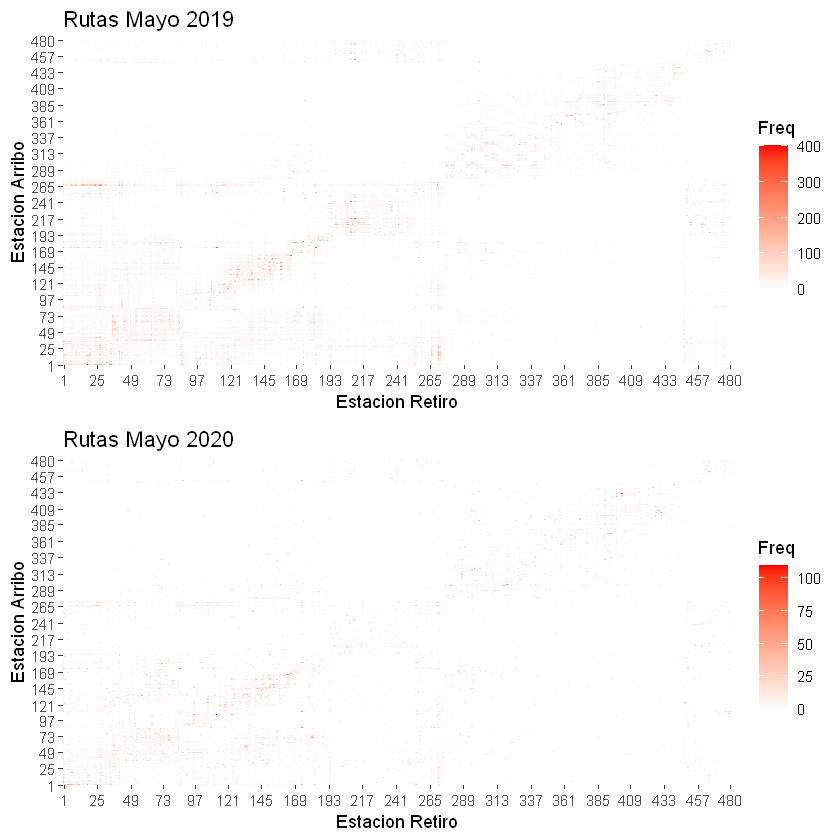

In [22]:
hm19 = ggplot(data = rutas19, aes(x = Var1, y = Var2, fill= Freq)) + geom_tile() + scale_fill_gradient2(high="red",mid="white",low="blue",
na.value="yellow") + xlab("Estacion Retiro") + ylab("Estacion Arribo") + ggtitle("Rutas Mayo 2019") + scale_x_discrete("Estacion Retiro",c(seq(1,480,24),480)) + scale_y_discrete("Estacion Arribo",c(seq(1,480,24),480))
hm20 = ggplot(data = rutas20, aes(x = Var1, y = Var2, fill= Freq)) + geom_tile() + scale_fill_gradient2(high="red",mid="white",low="blue",
na.value="yellow") + xlab("Estacion Retiro") + ylab("Estacion Arribo") + ggtitle("Rutas Mayo 2020") + scale_x_discrete("Estacion Retiro",c(seq(1,480,24),480)) + scale_y_discrete("Estacion Arribo",c(seq(1,480,24),480))
grid.arrange(hm19,hm20)

Las zonas rojas en los heatplots permiten observar que las mayores frecuencias se localizan en torno a la diagonal, lo cual indica que una gran cantidad de viajes se realizan entre estaciones numéricamente cercanas. Aunque la numeración de una estación no se encuentra en función del área geográfica, y dos estaciones cercanas en numeración no necesariamente son físicamente cercanas, el mapa de cicloestaciones sí muestra que en general, estaciones etiquetadas por números cercanos, se encuentran probablemente en el mismo vecindario, colonias o zonas de la ciudad. Así pues, a través el heatmat es posible obtener evidencia de que frecuentemente los viajes son hechos dentro de las cercanías.

La aparente simetría del heatmap con respecto a la diagonal revela también que la frecuencia de uso de bicicletas es más o menos similar en retiros y arribos, es decir, una ruta que es frecuentemente recorrida en un sentido, será posiblemente recorrida de manera frecuente en el sentido inverso, o existirá una ruta similar frecuentemente recorrida.

En el gráfico correspondiente a Mayo 2019, y en menor medida en Mayo 2020, es posible apreciar de forma clara la existencia de un número grande de viajes cuyo punto de inicio o punto de llegada se encuentran entre las estaciones 266, 267 y 271, que destacan entre las cicloestaciones de retiro y arribo más frecuentes según el análisis anterior.

Si bien no se cuenta con las distancias mínimas entre estaciones, es posible tener una idea de la cercanía o alejamiento entre estaciones a través de las duración promedio de viajes (regulares) de los usuarios que cubren las distintas rutas. Estos promedios pueden calcularse y visualizarse también en un heatmap.

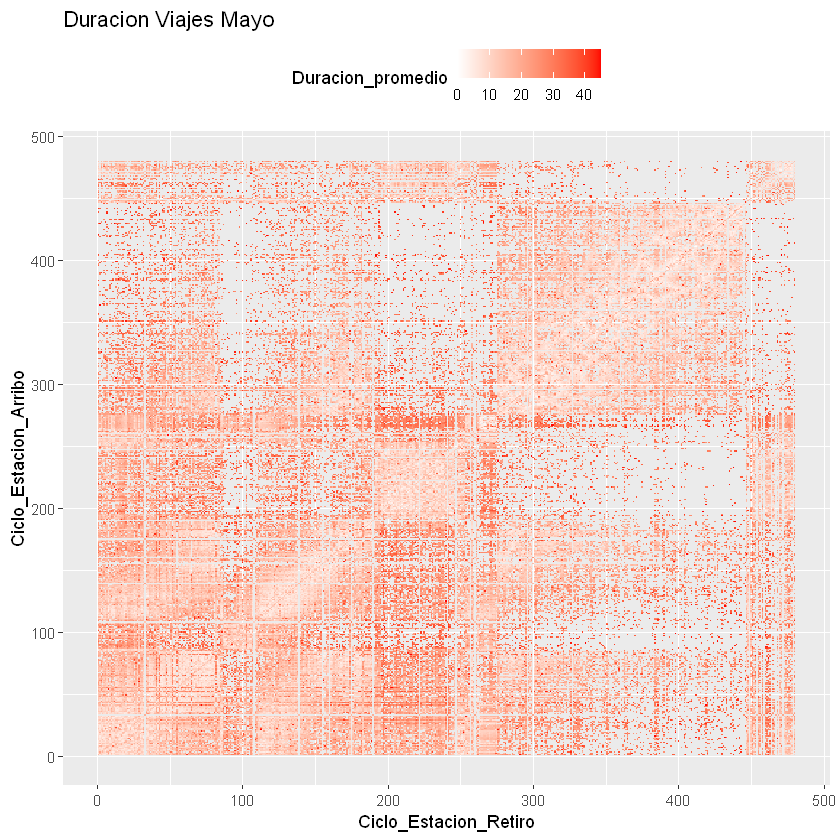

In [23]:
Duracion_rutas = Mayo_filt %>% group_by(Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo) %>% summarise(Duracion_promedio = mean(Duracion),.groups = "drop")
ggplot(data = Duracion_rutas, aes(x = Ciclo_Estacion_Retiro, y = Ciclo_Estacion_Arribo, fill=Duracion_promedio)) + geom_tile()  + theme(legend.position = "top") + ggtitle("Duracion Viajes Mayo") + scale_fill_gradient2(high="red",mid="white",low="blue",
na.value="yellow")

La existencia de franjas intensas cercanas a la diagonal representa estaciones muy cercanas en numeración pero lejanas geográficamente. Un ejemplo es la estación 275 (HÉROES FERROCARRILEROS-AV. INSURGENTES NORTE) localizada al norte de la ciudad, mientras que la estación 276 (ANAXÁGORAS-OBRERO MUNDIAL) se encuentra en el sur.

Otro aspecto de interés que puede explorarse con la información de la base, es el conjunto de rutas más frecuentes que son recorridas por los usuarios. Las 10 principales rutas en Mayo 2019 y Mayo 2020, acompanadas de su duración promedio se presentan a continuación:

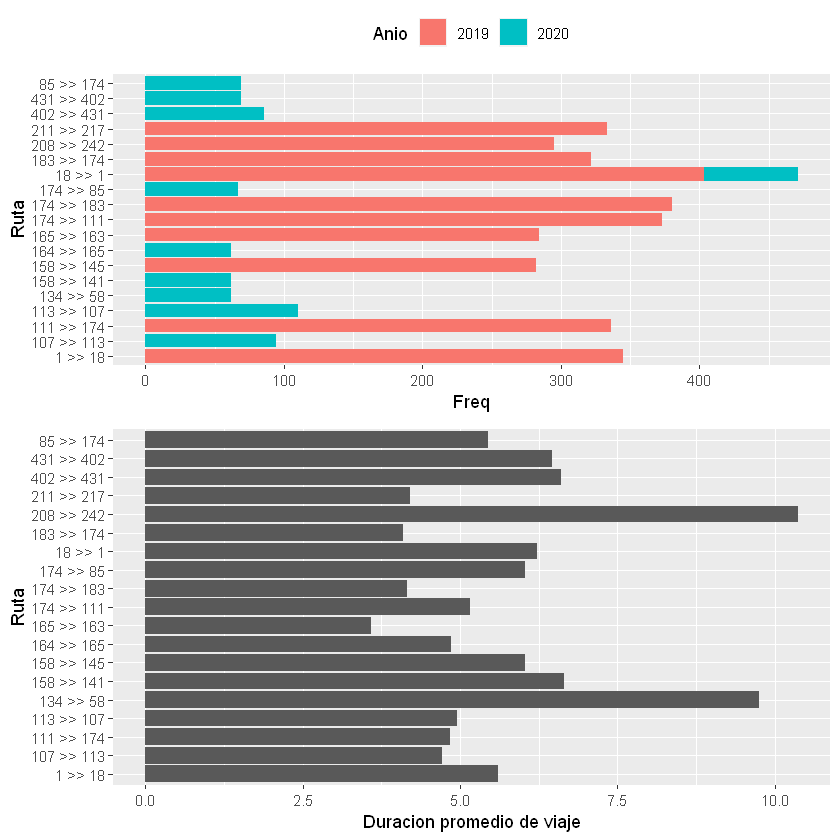

In [24]:
c1 = rutas19 %>% dplyr::select(Anio,Var1,Var2,Freq) %>% rename(Estacion_Retiro = Var1, Estacion_Arribo = Var2 ) %>% arrange(desc(Freq)) %>% head(10)
c2 = rutas20 %>% dplyr::select(Anio,Var1,Var2,Freq) %>% rename(Estacion_Retiro = Var1, Estacion_Arribo = Var2 ) %>% arrange(desc(Freq)) %>% head(10)
c3 = rbind(c1,c2)
c3 = c3 %>% mutate(Ruta=paste(Estacion_Retiro,">>",Estacion_Arribo))
c3plot = c3 %>% ggplot() + geom_bar(aes(x=Freq,y=Ruta,fill=Anio),stat="identity",position= position_stack(reverse = TRUE)) + theme(legend.position = "top")
Mayo_filt_crutas = Mayo_filt %>% mutate(Ruta=paste(Ciclo_Estacion_Retiro,">>",Ciclo_Estacion_Arribo))
Duracion_rutas = Mayo_filt_crutas %>% filter(Ruta %in% c3$Ruta) %>% group_by(Ruta) %>% summarise(Duracion_promedio = mean(Duracion),.groups = "drop")
Duracion_rutas_plot = Duracion_rutas %>% ggplot() + geom_bar(aes(x=Duracion_promedio,y=Ruta),stat="identity") + xlab("Duracion promedio de viaje")
grid.arrange(c3plot,Duracion_rutas_plot)

Las rutas más frecuentes para el caso de ambos años son todas menores 15 minutos. 

Por ello, se muestran también las 10 rutas mas frecuentes con duraciones promedio de entre 15 a 30 minutos, y 30 a 45 minutos.

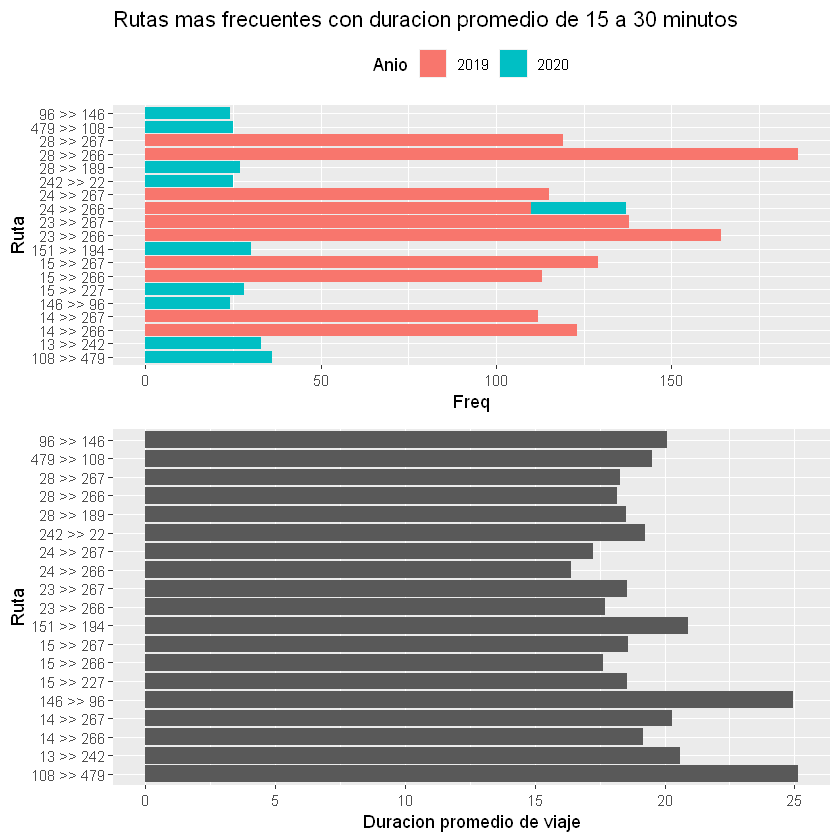

In [25]:
rutas19_2=data.frame(table(Mayo19_filt$Ciclo_Estacion_Retiro[which(Mayo19_filt$Ciclo_Estacion_Retiro!=Mayo19_filt$Ciclo_Estacion_Arribo & Mayo19_filt$Duracion>=15 & Mayo19_filt$Duracion<=30)],Mayo19_filt$Ciclo_Estacion_Arribo[which(Mayo19_filt$Ciclo_Estacion_Retiro!=Mayo19_filt$Ciclo_Estacion_Arribo & Mayo19_filt$Duracion>=15 & Mayo19_filt$Duracion<=30)])) %>% mutate(Anio="2019")
rutas20_2=data.frame(table(Mayo20_filt$Ciclo_Estacion_Retiro[which(Mayo20_filt$Ciclo_Estacion_Retiro!=Mayo20_filt$Ciclo_Estacion_Arribo & Mayo20_filt$Duracion>=15 & Mayo20_filt$Duracion<=30)],Mayo20_filt$Ciclo_Estacion_Arribo[which(Mayo20_filt$Ciclo_Estacion_Retiro!=Mayo20_filt$Ciclo_Estacion_Arribo & Mayo20_filt$Duracion>=15 & Mayo20_filt$Duracion<=30)])) %>% mutate(Anio="2020")
c1_2 = rutas19_2 %>% dplyr::select(Anio,Var1,Var2,Freq) %>% rename(Estacion_Retiro = Var1, Estacion_Arribo = Var2 ) %>% arrange(desc(Freq)) %>% head(10)
c2_2 = rutas20_2 %>% dplyr::select(Anio,Var1,Var2,Freq) %>% rename(Estacion_Retiro = Var1, Estacion_Arribo = Var2 ) %>% arrange(desc(Freq)) %>% head(10)
c3_2 = rbind(c1_2,c2_2)
c3_2 = c3_2 %>% mutate(Ruta=paste(Estacion_Retiro,">>",Estacion_Arribo))
c3plot_2 = c3_2 %>% ggplot() + geom_bar(aes(x=Freq,y=Ruta,fill=Anio),stat="identity",position= position_stack(reverse = TRUE)) + theme(legend.position = "top") + ggtitle("Rutas mas frecuentes con duracion promedio de 15 a 30 minutos")
Mayo_filt_crutas = Mayo_filt %>% mutate(Ruta=paste(Ciclo_Estacion_Retiro,">>",Ciclo_Estacion_Arribo))
Duracion_rutas_2 = Mayo_filt_crutas %>% filter(Ruta %in% c3_2$Ruta) %>% group_by(Ruta) %>% summarise(Duracion_promedio = mean(Duracion),.groups = "drop")
Duracion_rutas_plot_2 = Duracion_rutas_2 %>% ggplot() + geom_bar(aes(x=Duracion_promedio,y=Ruta),stat="identity") + xlab("Duracion promedio de viaje")
grid.arrange(c3plot_2,Duracion_rutas_plot_2)

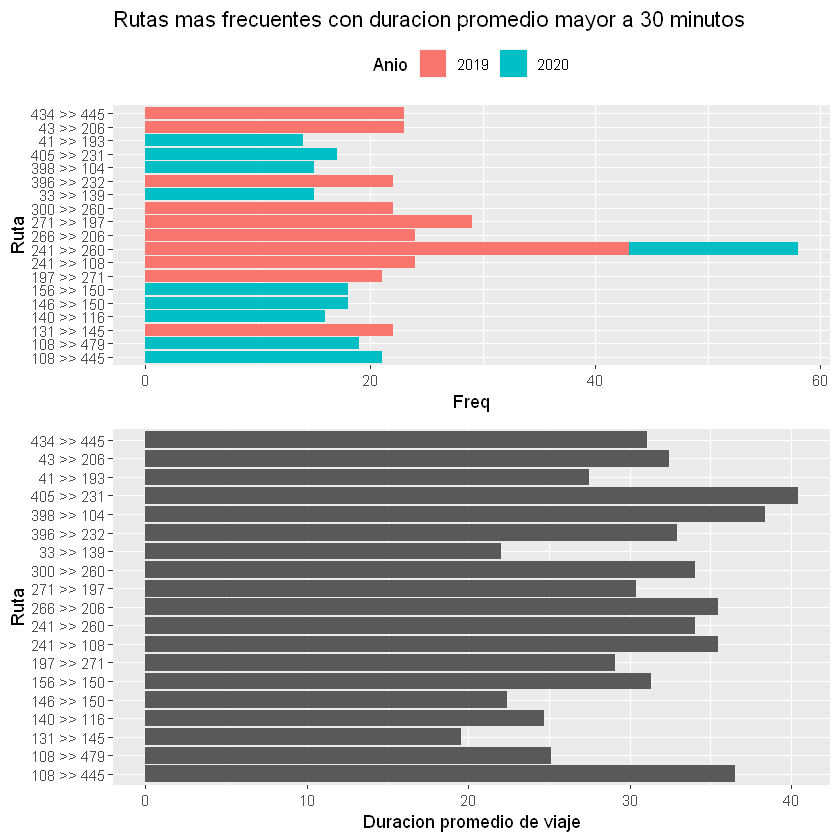

In [27]:
rutas19_3=data.frame(table(Mayo19_filt$Ciclo_Estacion_Retiro[which(Mayo19_filt$Ciclo_Estacion_Retiro!=Mayo19_filt$Ciclo_Estacion_Arribo & Mayo19_filt$Duracion>30)],Mayo19_filt$Ciclo_Estacion_Arribo[which(Mayo19_filt$Ciclo_Estacion_Retiro!=Mayo19_filt$Ciclo_Estacion_Arribo &  Mayo19_filt$Duracion>30)])) %>% mutate(Anio="2019")
rutas20_3=data.frame(table(Mayo20_filt$Ciclo_Estacion_Retiro[which(Mayo20_filt$Ciclo_Estacion_Retiro!=Mayo20_filt$Ciclo_Estacion_Arribo & Mayo20_filt$Duracion>30)],Mayo20_filt$Ciclo_Estacion_Arribo[which(Mayo20_filt$Ciclo_Estacion_Retiro!=Mayo20_filt$Ciclo_Estacion_Arribo &  Mayo20_filt$Duracion>30)])) %>% mutate(Anio="2020")
c1_3 = rutas19_3 %>% dplyr::select(Anio,Var1,Var2,Freq) %>% rename(Estacion_Retiro = Var1, Estacion_Arribo = Var2 ) %>% arrange(desc(Freq)) %>% head(10)
c2_3 = rutas20_3 %>% dplyr::select(Anio,Var1,Var2,Freq) %>% rename(Estacion_Retiro = Var1, Estacion_Arribo = Var2 ) %>% arrange(desc(Freq)) %>% head(10)
c3_3 = rbind(c1_3,c2_3)
c3_3 = c3_3 %>% mutate(Ruta=paste(Estacion_Retiro,">>",Estacion_Arribo))
c3plot_3 = c3_3 %>% ggplot() + geom_bar(aes(x=Freq,y=Ruta,fill=Anio),stat="identity",position= position_stack(reverse = TRUE)) + theme(legend.position = "top") + ggtitle("Rutas mas frecuentes con duracion promedio mayor a 30 minutos")
Mayo_filt_crutas = Mayo_filt %>% mutate(Ruta=paste(Ciclo_Estacion_Retiro,">>",Ciclo_Estacion_Arribo))
Duracion_rutas_3 = Mayo_filt_crutas %>% filter(Ruta %in% c3_3$Ruta) %>% group_by(Ruta) %>% summarise(Duracion_promedio = mean(Duracion),.groups = "drop")
Duracion_rutas_plot_3 = Duracion_rutas_3 %>% ggplot() + geom_bar(aes(x=Duracion_promedio,y=Ruta),stat="identity") + xlab("Duracion promedio de viaje")
grid.arrange(c3plot_3,Duracion_rutas_plot_3)

Comparando las frecuencias de las rutas mas usuales para viajes de distinta duración puede observarse que al incrementar la duración de viajes, la aparición de rutas en ambos sentidos comienza a ser menor. Los datos sugieren que para viajes no tan largos, rutas que son muy transitadas en un sentido, generalemente lo son también en el otro y con frecuencias similares, mientras que una mayor duración de los viajes parece romper con esta simetría.

### Duración de Viaje

A partir de las observaciones correspondientes a viajes regulares (de 45 minutos o menos), se obtienen los siguientes resúmenes, histogramas y boxplots, comparando entre Mayo 2019 y Mayo 2020. A través de estas herramientas descriptivas es posible notar que si bien algunos extadísticos son iguales (como la mediana por ejemplo) los valores del primer y tercer cuartil, así como la desviación estándar, dan evidencia de que la distribución de la duración de viajes regulares en Mayo 2020 presenta una mayor dispersión.

In [28]:
#data.frame(summary(Mayo19_filt))
x = summary(Mayo19_filt$Duracion)
x=data.frame(x=matrix(x),row.names=names(x))
y= summary(Mayo20_filt$Duracion)
y=data.frame(y=matrix(y),row.names=names(y))
df=cbind(x,y) %>% rename(`Duracion_2019`=x,`Duracion_2020`=y)
z= data.frame(Duracion_2019=sd(Mayo19_filt$Duracion),Duracion_2020=sd(Mayo20_filt$Duracion))
df = rbind(df,z)
rownames(df)[7] = "Std. Dev."
df

Duracion_2019 Duracion_2020
Min.       0.00000       0.00000     
1st Qu.    7.00000       6.00000     
Median    11.00000      11.00000     
Mean      13.03419      13.75468     
3rd Qu.   17.00000      19.00000     
Max.      45.00000      45.00000     
Std. Dev.  8.48280      10.26561

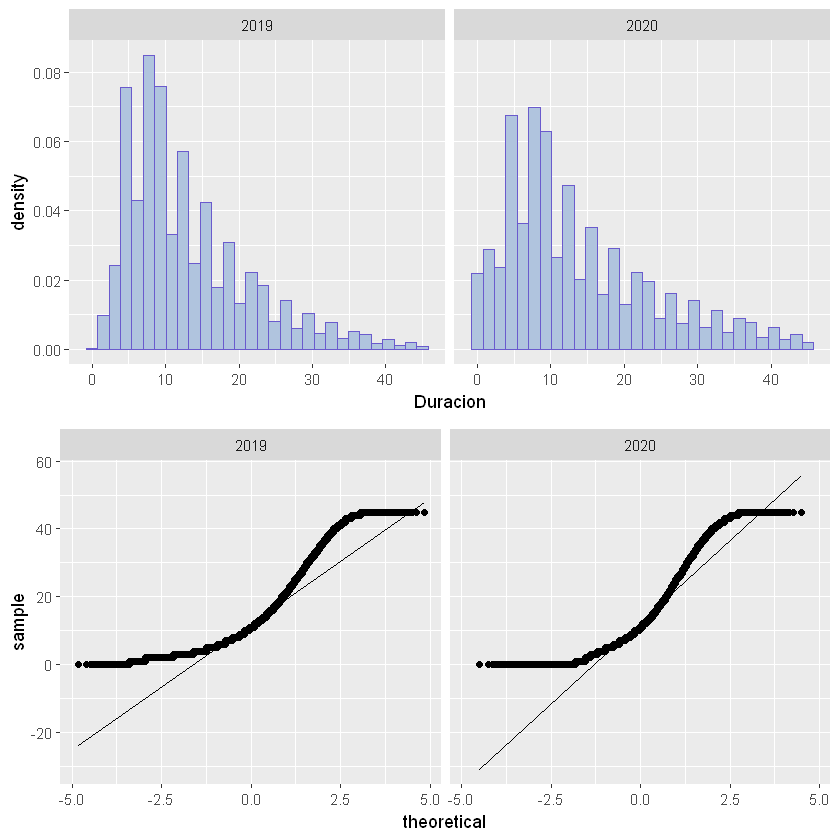

In [29]:
pl1 = Mayo_filt %>% ggplot(aes(group=Anio)) + geom_histogram(aes(x=Duracion,y=..density..),colour="slateblue",bins=30,fill="lightsteelblue") + facet_wrap(~Anio)
pl2 = Mayo_filt %>% ggplot(aes(sample = Duracion)) +  stat_qq(distribution = stats::qnorm) + stat_qq_line(distribution = stats::qnorm) + facet_wrap(~Anio)
grid.arrange(pl1,pl2)

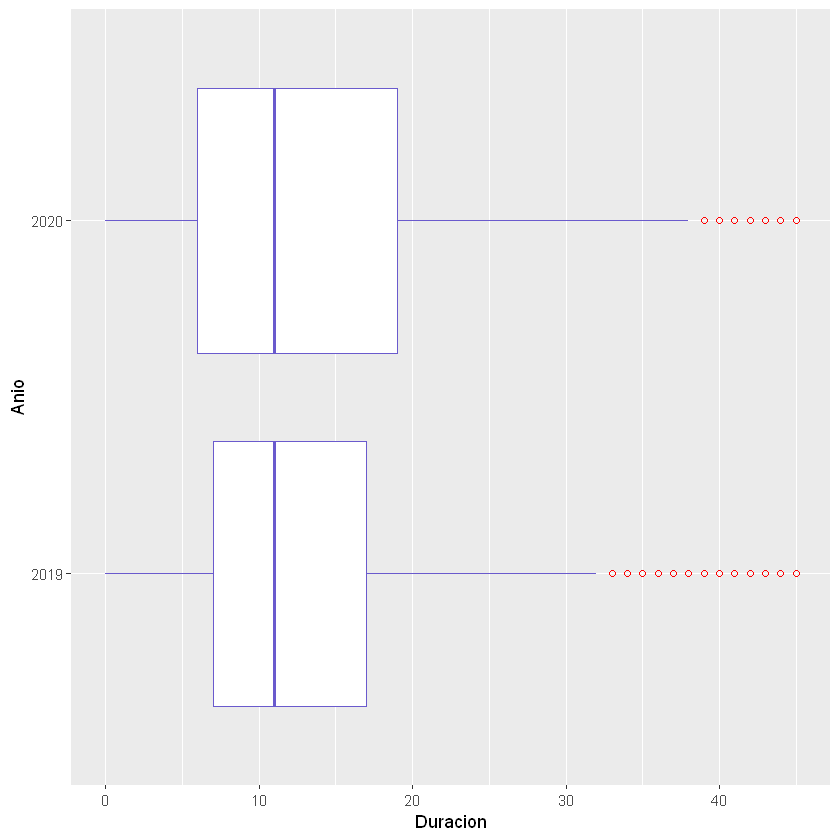

In [30]:
Mayo_filt %>% ggplot(aes(group=Anio)) + geom_boxplot(aes(x=Duracion,y=Anio),colour="slateblue",outlier.colour = "red", outlier.shape = 1)
  #theme(axis.title.x=element_blank(),
   #     axis.text.x=element_blank(),
    #    axis.ticks.x=element_blank())

Resulta interesante cuestionar si la duración promedio de los viajes en Mayo 2020 es de hecho mayor que la duración promedio en Mayo 2019.

Debido al tamaño de muestra grande, resulta razonable aplicar la prueba T de Welch para dos muestras, en la cual se pretende contrastar
$$
H_0: \quad \mu_{2019} - \mu_{2020} = 0 \qquad \text{vs} \qquad H_1: \quad \mu_{2019} - \mu_{2020} \neq 0
$$

A diferencia de la prueba T de Student, la T de Welch no supone igualdad de varianzas, aunque el supuesto de normalidad sigue manteniéndose. Existen procedimientos para probar la igualdad de varianzas, tal como el test de Levene. Sin embargo, algunos autores sugieren que no es conveniente aplicar tales con la finalidad de decidir si se usará la prueba de Student o de Welch, ya que el tamaño de la prueba (la probabilidad máxima de cometer un error tipo I) puede ser distorsionado:

*Zimmerman, D. W. (2004). A note on preliminary tests of equality of variances. British Journal of Mathematical and Statistical Psychology, 57(1), 173–181.* [Ref.](https://doi.org/10.1348/000711004849222)

Dado que la prueba T de Welch tiene una potencia casi tan alta como la prueba T de Student bajo el supuesto de homogeneidad de varianzas, y retiene mayor potencia cuando dicho supuesto es violado, es recomendable aplicar el test de Welch diractamente sin verificar la homogeneidad previamente.

Adicionalmente, la prueba de Welch es moderadamente robusta a la violación de normalidad siempre que el sesgo no sea muy grande.

La prueba de Welch se lleva a cabo utilizando la funcion `t.test` de `R`, y el resultado de presenta a continuacion.

In [31]:
t.test(x=Mayo19_filt$Duracion,y=Mayo20_filt$Duracion)


	Welch Two Sample t-test

data:  Mayo19_filt$Duracion and Mayo20_filt$Duracion
t = -25.299, df = 189844, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7763107 -0.6646745
sample estimates:
mean of x mean of y 
 13.03419  13.75468 


La prueba de dos colas es rechazada al nivel $0.05$ se significancia.

Esta prueba posee versión de una cola, en la cual las hipótesis pueden plantearse como

$$
H_0: \quad \mu_{2019} - \mu_{2020} \geq 0 \qquad \text{vs} \qquad H_1: \quad \mu_{2019} - \mu_{2020} < 0
$$
 
Esta prueba se lleva a cabo con la misma función `t.test`, empleando el argumento `alternative="less"`.

In [33]:
t.test(x=Mayo19_filt$Duracion,y=Mayo20_filt$Duracion,alternative = "less")


	Welch Two Sample t-test

data:  Mayo19_filt$Duracion and Mayo20_filt$Duracion
t = -25.299, df = 189844, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.6736487
sample estimates:
mean of x mean of y 
 13.03419  13.75468 


Usando nuevamente un nivel de significancia de $0.05$, se rechaza $H_0$ en favor de la hipótesis de que la media de la duración de viajes regulares en Mayo 2020 es mayor que la de Mayo 2019.

Dada la no normalidad de los datos, otra prueba que es conveniente aplicar es el test no paramétrico de Mann–Whitney–Wilcoxon, que no posee supuestos distribucionales. Este test es aplicable cuando se tienen muestras independientes, y nos permite investigar si dos muestras provienen de la misma distribución.

La funcion `wilcox.test` en `R` permite contrastar la hipótesis.

In [34]:
wilcox.test(x=Mayo19_filt$Duracion,y=Mayo20_filt$Duracion,paired = FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Mayo19_filt$Duracion and Mayo20_filt$Duracion
W = 5.4484e+10, p-value = 0.05613
alternative hypothesis: true location shift is not equal to 0


En este caso, la hipótesis de igualdad de distribucion de la duración en Mayo 2019 y 2020, no es rechazada al nivel de significancia 0.05. Este resultado no implica que ambas distribuciones son iguales, simplemente indica que de acuerdo al estadístico de prueba obtenido, no se tiene evidencia estadísticamente significativa para rechazar que esa hipótesis pueda ser cierta. La información dada por esta prueba puede usarse en conjunto con la de Welch y demás pruebas para arribar a una conclusión. 

Para cada usuario, la duración de viaje puede ser influida por un gran número de factores. Entre las variables de interés que se tienen en la base, se encuentran el género, y la edad dividida por grupos. 

Graficamente, histogramas o densidades estimadas, así como boxplots, pueden proporcionar una idea de la variación de la duración en los distintos grupos definidos por género, grupo de edad, y año.

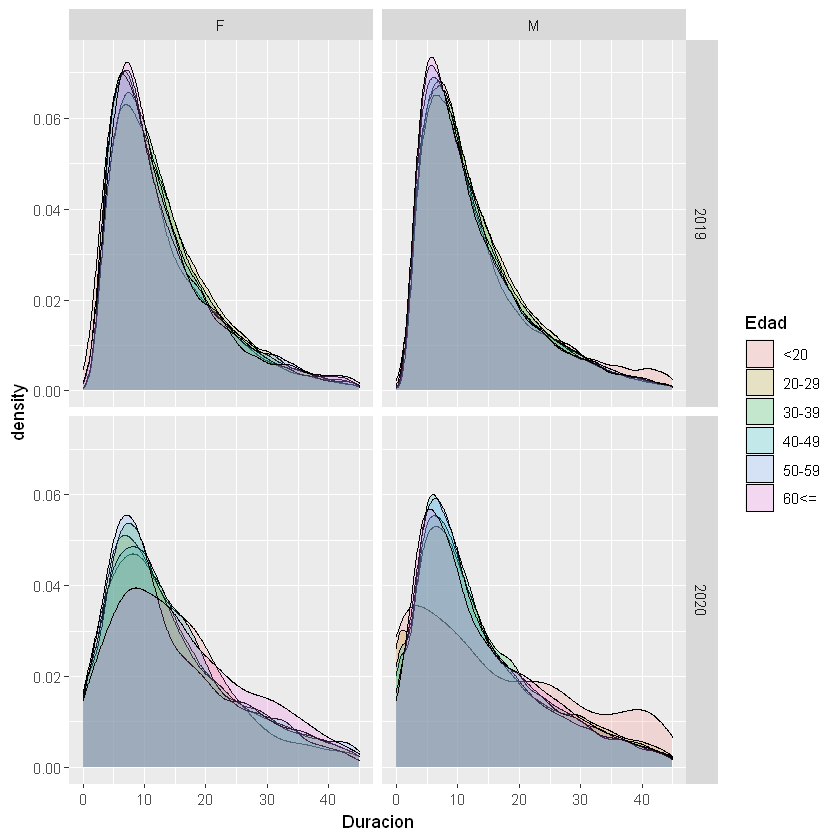

In [35]:
Mayo_filt %>% mutate(Edad=ifelse(Edad_Usuario<20,"<20",ifelse(Edad_Usuario<30,"20-29",ifelse(Edad_Usuario<40,"30-39",ifelse(Edad_Usuario<50,"40-49",ifelse(Edad_Usuario<60,"50-59","60<=")))))) %>%
ggplot(aes()) + geom_density(aes(x=Duracion,fill=Edad),alpha=0.2) + facet_grid(Anio~Genero_Usuario)

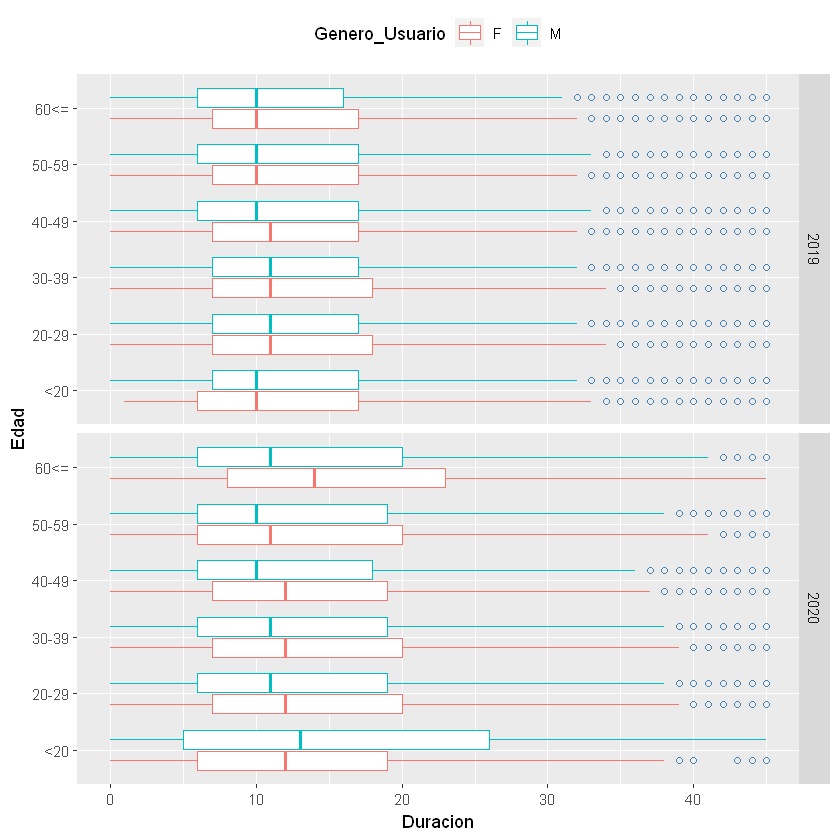

In [47]:
Mayo_filt %>% mutate(Edad=ifelse(Edad_Usuario<20,"<20",ifelse(Edad_Usuario<30,"20-29",ifelse(Edad_Usuario<40,"30-39",ifelse(Edad_Usuario<50,"40-49",ifelse(Edad_Usuario<60,"50-59","60<=")))))) %>%
ggplot(aes()) + geom_boxplot(aes(x=Duracion,y=Edad,colour=Genero_Usuario),outlier.colour = "steelblue", outlier.shape = 1) + theme(legend.position = "top") + facet_grid(rows = vars(Anio)) 

Debido a que el mes de Mayo de 2020 es anómalo debido a la pandemia por coronavirus, y en consecuencia la base presenta menos observaciones y refleja un comportamiento posiblemente inusual, es una buena idea analizar la variabilidad de la duración de viaje utilizando la base de Mayo 2019.

Un método muy utilizado para medir el efecto que tienen algunos factores (en este caso el género y grupo de edad) sobre una variable cuantitativa (la duración de viaje), es el de análisis de varianza (ANOVA), en el cual se modela el vector respuesta $\vec{Y}$ como
$$
\vec{Y} = X\vec{\beta} + \vec{\varepsilon}
$$

con $\vec{\beta}$ un vector de coeficientes, $X$ una matriz de diseño que contiene la información sobre los factores y $\vec{\varepsilon}$ un vector aleatorio de errores, centrado ($\vec{\mu}=\vec{0}$) y con matriz de covarianzas esférica $\Sigma = \sigma^2 I $. Si se supone una distribución normal multivariada para el vector de errores, es posible probar estadísticamente si los factores contribuyen a explicar la variabilidad de la variable respuesta, a través de estadísticos sencillos dados en términos de cocientes entre sumas de cuadrados medias, que resultan tener distribuciones $F$.

El modelo puede ajusarse utilizando la funcion `lm`, que construye variables auxiliares, también llamadas "dummy", para la construcción de la matriz de diseño y el ajuste. Debido a que el modelo de análisis de varianza es por construcción de rango incompleto, no existe una solución única a las ecuaciones normales. Por ello se hacen cero los coeficientes asociados al primer nivel de cada factor, y posteriormente se encuentra una solución única bajo esta restricción. A pesar de que las ecuaciones normales para modelos de rango incompleto tienen una infinidad de soluciones, los valores ajustados, residuales, y demás estadísticos relevantes tales como sumas de cuadrados medias, sí resultan ser únicos.

Si bien es evidente que no se tiene normalidad dentro de los grupos, debido a la robustez del ANOVA frente a la no normalidad y sesgo moderado, es conveniente aplicarlo y observar la tabla de análisis de varianza obtenida, recordardo que los p-values serán conservadores.

In [37]:
Mayo_an =Mayo19_filt %>% mutate(Edad=ifelse(Edad_Usuario<20,"<20",ifelse(Edad_Usuario<30,"20-29",ifelse(Edad_Usuario<40,"30-39",ifelse(Edad_Usuario<50,"40-49",ifelse(Edad_Usuario<60,"50-59","60<=")))))) 
m1= lm(formula=Duracion ~ Genero_Usuario + Edad + Genero_Usuario*Edad ,data=Mayo_an)

In [38]:
summary(m1)


Call:
lm(formula = Duracion ~ Genero_Usuario + Edad + Genero_Usuario * 
    Edad, data = Mayo_an)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.622  -6.399  -2.124   4.115  32.562 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                12.4384     0.1988  62.558  < 2e-16 ***
Genero_UsuarioM             0.9687     0.2327   4.162 3.15e-05 ***
Edad20-29                   1.1839     0.2011   5.886 3.96e-09 ***
Edad30-39                   0.9609     0.2014   4.771 1.83e-06 ***
Edad40-49                   0.5000     0.2068   2.418  0.01561 *  
Edad50-59                   0.6614     0.2139   3.092  0.00199 ** 
Edad60<=                    0.6086     0.2476   2.458  0.01398 *  
Genero_UsuarioM:Edad20-29  -1.4671     0.2356  -6.228 4.74e-10 ***
Genero_UsuarioM:Edad30-39  -1.4830     0.2356  -6.293 3.11e-10 ***
Genero_UsuarioM:Edad40-49  -1.1327     0.2411  -4.698 2.63e-06 ***
Genero_UsuarioM:Edad50-59  -1.4319     0.2488  -5.756 8

In [39]:
anova(m1)

Df     Sum Sq       Mean Sq     F value   Pr(>F)       
Genero_Usuario           1    33917.000 33916.99961 471.90834 1.328251e-104
Edad                     5    25917.335  5183.46701  72.12080  9.518086e-76
Genero_Usuario:Edad      5     4555.479   911.09574  12.67664  2.427811e-12
Residuals           740468 53218921.599    71.87201        NA            NA

De acuerdo a la tabla ANOVA, los factores género y grupo de edad contribuyen a explicar la variabilidad de la duración de viaje, y la interacción de ambos factores también en estadísticamente significativa.

Una alternativa no paramétrica al análisis de varianza para el caso de un factor explicativo, es la prueba de Kruskal-Wallis, que es de hecho una extensión del test de Mann–Whitney–Wilcoxon a tres grupos o más. Esta prueba está disponible en `R` a través de la función `kruskal.test`.

Si bien la prueba de Kruskal-Wallis no es aplicable a dos o más factores simultáneamente tal como el caso de ANOVA, es una herramienta que permite investigar si la duración de los viajes difiere significativamente con el género y con el grupo de edad.

A continuación se realiza el contraste de hipótesis para ambos factores de interés.

In [43]:
kruskal.test(Duracion ~ Genero_Usuario, data = Mayo_an)


	Kruskal-Wallis rank sum test

data:  Duracion by Genero_Usuario
Kruskal-Wallis chi-squared = 780.07, df = 1, p-value < 2.2e-16


In [44]:
kruskal.test(Duracion ~ Edad, data = Mayo_an)


	Kruskal-Wallis rank sum test

data:  Duracion by Edad
Kruskal-Wallis chi-squared = 939.91, df = 5, p-value < 2.2e-16


En ambos casos los p-values son estadísticamente significativos, por lo cual se concluye que la duración de los viajes en ecobici difiere con el género del usuario, y también difiere con el grupo de edad.

Dada la conclusión anterior dada por la prueba de Welch, sobre la duración mayor de los viajes en Mayo 2020, es de interés investigar si una mayor proporción de gente realizó viajes superiores a los 45 minutos en Mayo 2020.

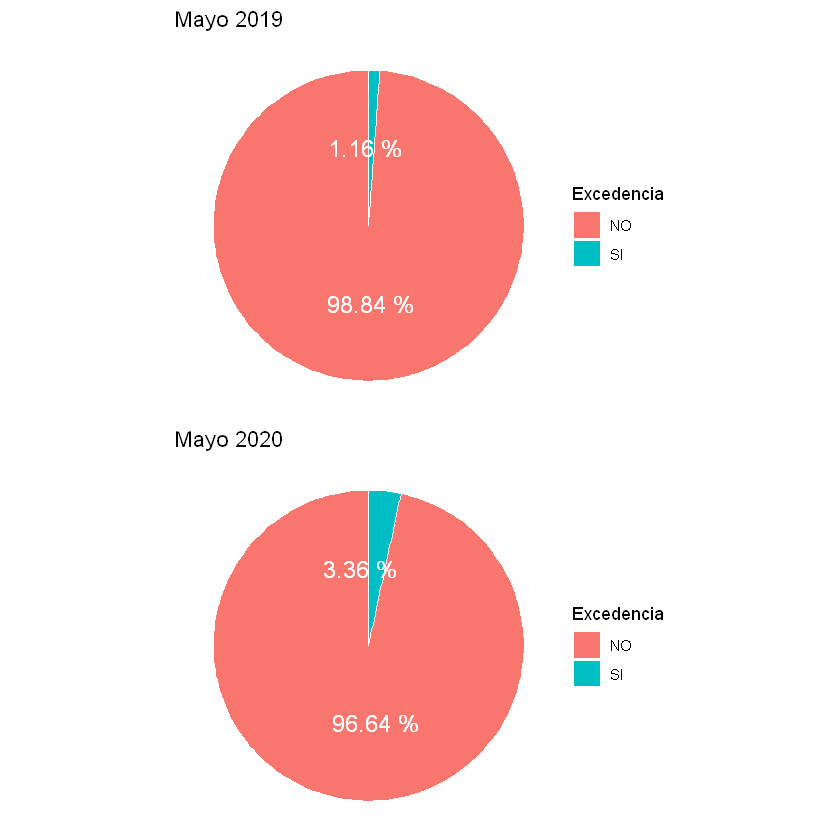

In [45]:
Exc19 = Mayo19 %>% group_by(Excedencia) %>% summarise(count=n(),.groups = "drop") %>% mutate(prop=round(100*count/dim(Mayo19)[1],2),lab.ypos = cumsum(prop) - 0.5*prop)
exc19=ggplot(Exc19, aes(x = "", y = prop, fill = Excedencia)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = 0)+
  geom_text(aes(y = lab.ypos, label = paste(prop,"%")), color = "white",size=5)+  theme_void() + ggtitle("Mayo 2019")
Exc20 = Mayo20 %>% group_by(Excedencia) %>% summarise(count=n(),.groups = "drop") %>% mutate(prop=round(100*count/dim(Mayo20)[1],2),lab.ypos = cumsum(prop) - 0.5*prop)
exc20=ggplot(Exc20, aes(x = "", y = prop, fill = Excedencia)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = 0)+
  geom_text(aes(y = lab.ypos, label = paste(prop,"%")), color = "white",size=5)+  theme_void() + ggtitle("Mayo 2020")
grid.arrange(exc19,exc20)

Visualmente se puede corroborar que la proporción de viajes mayores a 45 minutos fue mayor en Mayo 2020.

En `R` se puede emplear la función `prop.test` para llevar a cabo la prueba para igualdad de proporciones de excedencia en el tiempo de viaje, de una cola, para contrastar las siguientes hipótesis:

$$
H_0: \quad p_{2019} \geq p_{2020} \qquad \text{vs} \qquad H_1: \quad p_{2019} < p_{2020}
$$

la cual funciona con base en el Teorema de Límite Central, y emplea el estadístico de prueba

$$
Z=\dfrac{\hat{p}_{2019}-\hat{p}_{2020}}{\sqrt{\hat{p}(1-\hat{p})\left(\dfrac{1}{n_{2019}}+\dfrac{1}{n_{2020}} \right)   }}
$$

donde $\hat{p}_{2019}$ y $\hat{p}_{2020}$ son las proporcines de excedencia de 45 minutos por viaje en Mayo 2019 y Mayo 2020 respectivamente, $n_{2019}$ y $n_{2020}$ son los tamaños de muestra, y $\hat{p}$ está dado por

$$
\hat{p}=\dfrac{n_{2019}\hat{p}_{2019}+n_{2020}\hat{p}_{2020}}{n_{2019}+n_{2020}}
$$


In [46]:
prop.test(x = c(sum((Mayo19$Excedencia=="SI")*1), sum((Mayo20$Excedencia=="SI")*1)), n = c(length(Mayo19$Excedencia), length(Mayo20$Excedencia)),alternative = "less")


	2-sample test for equality of proportions with continuity correction

data:  c(sum((Mayo19$Excedencia == "SI") * 1), sum((Mayo20$Excedencia ==  out of c(length(Mayo19$Excedencia), length(Mayo20$Excedencia))    "SI") * 1)) out of c(length(Mayo19$Excedencia), length(Mayo20$Excedencia))
X-squared = 4071.3, df = 1, p-value < 2.2e-16
alternative hypothesis: less
95 percent confidence interval:
 -1.00000000 -0.02122885
sample estimates:
    prop 1     prop 2 
0.01161006 0.03362835 


La hipótesis nula se rechaza en favor de la hipótesis alternativa al nivel 0.05 de significancia. Se concluye que los datos aportan evidencia estadísticamente significativa de que la proporción de viajes irregulares en Mayo 2020 es mayor que en Mayo 2019.

# Capítulo  3. Análisis de serie de tiempo

In [1]:
install.packages("pander")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library("ggplot2")
library("dplyr")
library("scales")
library("pander")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Dado el análisis descriptivo anterior y los resultados vistos en el *Capítulo 2* se proseguirá con un análisis de la cantidad de viajes realizados desde el año $2010$. En particular, nos interesará por una parte conocer el desempeño de los splines cúbicos para interpolar la cantidad de viajes realizados dentro de los datos años comprendidos, pero por otra buscaremos para pronosticar los meses enero, febrero, marzo, abril y mayo del año $2020$, pues se vio en la seccción anterior que hay cambios significativos entre el año anterior, este último punto se realizará en base a la metodología de los modelos $ARIMA$.


La motivación proviene de la situación actual que se vive hoy en día originada por la pandemia por **COVID-19**.

# Introducción

En el presente capítulo se realizará el análisis para la serie de tiempo cantidad de viajes realizados en la Ciudad de México utilizando las bicicletas del programa de gobierno *EcoBici*, en base a *splines cúbicos*.



Los datos se encuentran presentes en cada una de las bases de datos, las cuales pueden obtenerse descargándolas desde la página oficial del programa [Ecobici](https://www.ecobici.cdmx.gob.mx/es/informacion-del-servicio/open-data). Los datos son mensuales y se cuenta con información desde febrero de $2010$ hasta mayo $2020$, por lo que se tiene un total de $124$ observaciones, las cuales representan la cantidad de viajes realizados en el respectivo mes y año.

# Objetivo

Estudiar el desempeño de los splines cúbicos, al interpolar la cantidad de viajes tomando las observaciones (puntos) a nivel o corte:


* Trimestral
* Semestral
* Anual
* Bianual


Así como indicar qué corte obtiene un mejor desempeño en base a la métrica **error cuadrático medio**.

# Metodología

### Lectura y preparación de datos

In [3]:
data <- read.csv("EcoBici.csv", stringsAsFactors = FALSE) ### No se desea que el anio sea un factor, lo queremos como string

In [4]:
head(data)

Anio    Viajes
1 2010-02  1057 
2 2010-03 21024 
3 2010-04 44984 
4 2010-05 59814 
5 2010-06 64704 
6 2010-07 58767

In [5]:
tail(data)

Anio    Viajes
119 2019-12 584185
120 2020-01 676908
121 2020-02 686327
122 2020-03 529077
123 2020-04 159780
124 2020-05 153147

Los últimos $5$ años deberían indicar $2020$ en la variable `anio`, a pesar de que indique $2010$.

In [7]:
data$Anio[120:124] <- gsub("2010", "2020", data$Anio[120:124])

Se prefiere trabajar con letras minúsculas para el nombre de las variables, por lo que se cambiará la primera letra del nombre de cada columna a minúscula, además la primer columna `anio` no hace referencia al año únicamente, sino también al mes correspondiente, por lo que hará el cambio del nombre a `fecha`.

In [8]:
colnames(data) <- c("fecha", "viajes")

### Estructura de datos

In [9]:
summary(data)

    fecha               viajes      
 Length:124         Min.   :  1057  
 Class :character   1st Qu.:218704  
 Mode  :character   Median :665850  
                    Mean   :540405  
                    3rd Qu.:745155  
                    Max.   :878358  

In [10]:
str(data)

'data.frame':	124 obs. of  2 variables:
 $ fecha : chr  "2010-02" "2010-03" "2010-04" "2010-05" ...
 $ viajes: int  1057 21024 44984 59814 64704 58767 82329 100164 132294 134082 ...


Nótese que la variable `fecha` aparece como  `chr`, cuando en realidad debería ser un objeto `date` de `R`, a continuación se realizará el cambio correspondiente, para ello se supondrá que todos los meses tienen $28$ días, pues la función `as.Date`, presenta dificultades al tratar de identificar un mes que tiene $28$ días (febrero) al momento de agregarle $30$ días o más.

In [11]:
data$fecha <- as.Date(paste0(data$fecha,"-28"))

Para efectos de este análisis y para facilitar la selección de los distintos cortes (semestral, anual y bianual) se agregará la observación $2010-01-28$ que hace referencia al $28$ de enero de $2010$, cabe mencionar que no se tomará dicha observación para el análisis, es simplemente para faciltar el manejo de las fechas.

In [12]:
new_obs <- data.frame(fecha = as.Date("2010-01-28"), viajes = 0)
new_data <- rbind(new_obs, data)
head(new_data, 12)

fecha      viajes
1  2010-01-28      0
2  2010-02-28   1057
3  2010-03-28  21024
4  2010-04-28  44984
5  2010-05-28  59814
6  2010-06-28  64704
7  2010-07-28  58767
8  2010-08-28  82329
9  2010-09-28 100164
10 2010-10-28 132294
11 2010-11-28 134082
12 2010-12-28 141860

### Splines cúbicos

In [13]:
n <- nrow(new_data)
new_data$time <- 1:nrow(new_data)

In [14]:
trim <- c(2, seq(3, n, 3))
sem <- c(2, seq(6, n, 6))
anual <- c(2 ,seq(12, n, 12))
bianual <- c(2, seq(24, n, 24))

In [15]:
data_trim <- new_data[trim,]
data_sem <- new_data[sem,]
data_anual <- new_data[anual,]
data_bian <- new_data[bianual,]

In [16]:
spl_trim <- spline(data_trim$time, data_trim$viajes)
spl_sem <- spline(data_sem$time, data_sem$viajes)
spl_an <- spline(data_anual$time, data_anual$viajes)
spl_bian <- spline(data_bian$time, data_bian$viajes)

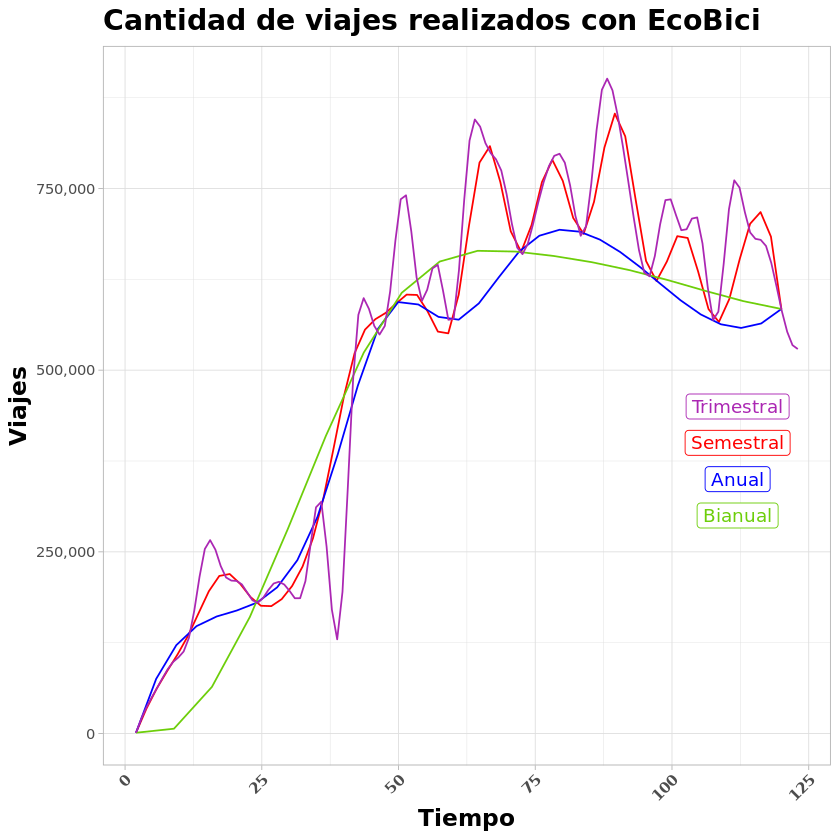

In [17]:
ggplot(data = data.frame(fecha = spl_sem$x, viajes = spl_sem$y), aes(fecha, viajes)) + 
    theme_light() +
    geom_line(color = "red") +
    geom_line(data = data.frame(fecha = spl_an$x, viajes = spl_an$y), color = "blue") +
    geom_line(data = data.frame(fecha = spl_bian$x, viajes = spl_bian$y), color = "#6DCE0A") +
    geom_line(data = data.frame(fecha = spl_trim$x, viajes = spl_trim$y), color = "#AB27B3") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"), 
          plot.title = element_text(size = 17, face = "bold"), 
          axis.title = element_text(size=14, face="bold")) + 
    annotate("label", x = 112, y = 450000, label = "Trimestral", color = "#AB27B3") +
    annotate("label", x = 112, y = 400000, label = "Semestral", color = "red") +
    annotate("label", x = 112, y = 350000, label = "Anual", color = "blue") +
    annotate("label", x = 112, y = 300000, label = "Bianual", color = "#6DCE0A") +
    scale_y_continuous(labels = comma) +
    xlab("Tiempo") + 
    ylab("Viajes") +
    ggtitle("Cantidad de viajes realizados con EcoBici")

In [18]:
spl_trim <- spline(data_trim$time, data_trim$viajes, n = 124)
spl_sem <- spline(data_sem$time, data_sem$viajes, n = 124)
spl_an <- spline(data_anual$time, data_anual$viajes, n = 124)
spl_bian <- spline(data_bian$time, data_bian$viajes, n = 124)

### Evaluación de splines cúbicos

Para el desempeño de cada uno de los splines cúbicos, estos son:



* `spl_sem`: splines cúbicos tomando únicamente los puntos que hacen referencia a periodo semianual (junio $(6)$ y diciembre $(23)$)
* `spl_an`: splines cúbicos tomando únicamente los puntos que hacen referencia a periodos anuales $(2010, 2011, 2012, ..., 2020)$
* `spl_bian`: splines cúbicos tomando únicamente los puntos que hacen referencia a periodos bianuales $(2010, 2012, 2014, ..., 2020)$


Se calculará el error cuadrático medio y el error relativo y se analizará cada uno de ellos por separado.

In [19]:
ecm <- function(x, y){
    ### Calcula el error cuadrático medio
    # Input x (vector): valor real
    # Input y (vector): pronostico o aproximación
    # Output rdo (float): error cuadrático medio entre x, y; o bien regresa string de error en caso de que las dimensiones 
    #                     no sean las mismas
    
    n <- length(x)
    m <- length(y)
    if(n == m){
        rdo <- sum((x-y)^2/x)
    }else{
        rdo <- "Las dimensiones entre los datos debe ser la misma"
    }
    return(rdo)
}

In [20]:
relative_error <- function(x, y){
    ### Calcula el error relativo
    # Input x (float): valor real
    # Input y (float): pronostico o aproximación
    # Output rdo (float): error relativo entre x, y; o bien regresa string de error en caso de que las dimensiones 
    #                     no sean las mismas
    
    rdo <- (abs(x-y)/x)
    return(rdo)
}

In [21]:
rdo_ecm <- data.frame(Spline_cubico = c("Trimestral", "Semestral", "Anual", "Bianual"),
                      Error_cuadratico_medio = c(ecm(data$viajes, spl_trim$y),
                                                 ecm(data$viajes, spl_sem$y),
                                                 ecm(data$viajes, spl_an$y),
                                                 ecm(data$viajes, spl_bian$y)),
                      n = c(nrow(data_trim), nrow(data_sem), nrow(data_anual), nrow(data_bian)))

In [22]:
pander::pander(rdo_ecm)



| Spline_cubico | Error_cuadratico_medio | n  |
|:-------------:|:----------------------:|:--:|
|  Trimestral   |        2724282         | 42 |
|   Semestral   |        4402860         | 21 |
|     Anual     |        4891195         | 11 |
|    Bianual    |        6563978         | 6  |



Obsérvese que el error cuadrático medio, es relativamente grande y aumenta a medida que el periodo temporal es mayor, lo cual es de esperar, debido a que la cantidad de puntos disminuye. A continuación se evaluará el error relativo para una fecha específica, la cual será julio de $2014$.

In [25]:
data[54,]

fecha      viajes
54 2014-07-28 662974

In [26]:
err_df <- data.frame(Corte = c("Trimestral", "Semestral", "Anual", "Bianual"),
                     Valor_real = rep(data$viajes[54], 4),
                     Interpolacion = c(spl_trim$y[54], spl_sem$y[54], spl_an$y[54],spl_bian$y[54]),
                    Error_relativo = c(relative_error(data$viajes[54], spl_trim$y[54]),
                                       relative_error(data$viajes[54], spl_sem$y[54]),
                                       relative_error(data$viajes[54], spl_an$y[54]),
                                       relative_error(data$viajes[54], spl_bian$y[54])))
pander::pander(err_df)



|   Corte    | Valor_real | Interpolacion | Error_relativo |
|:----------:|:----------:|:-------------:|:--------------:|
| Trimestral |   662974   |    596450     |     0.1003     |
| Semestral  |   662974   |    605605     |    0.08653     |
|   Anual    |   662974   |    593163     |     0.1053     |
|  Bianual   |   662974   |    624343     |    0.05827     |



Obsérvese que el error relativo es de primer y segundo grado, lo cual nos indica que nuestra precisión es a lo mejor de $2$ cifras, dado que estamos trabajando, en este caso particula, para una cifra de cien miles $(662,974)$, esto quiere decir que en el mejor de los casos estamos aproximandonos a la segunda cifra de derecha a izquierda, la cual corresponde a la unidad de diez miles.

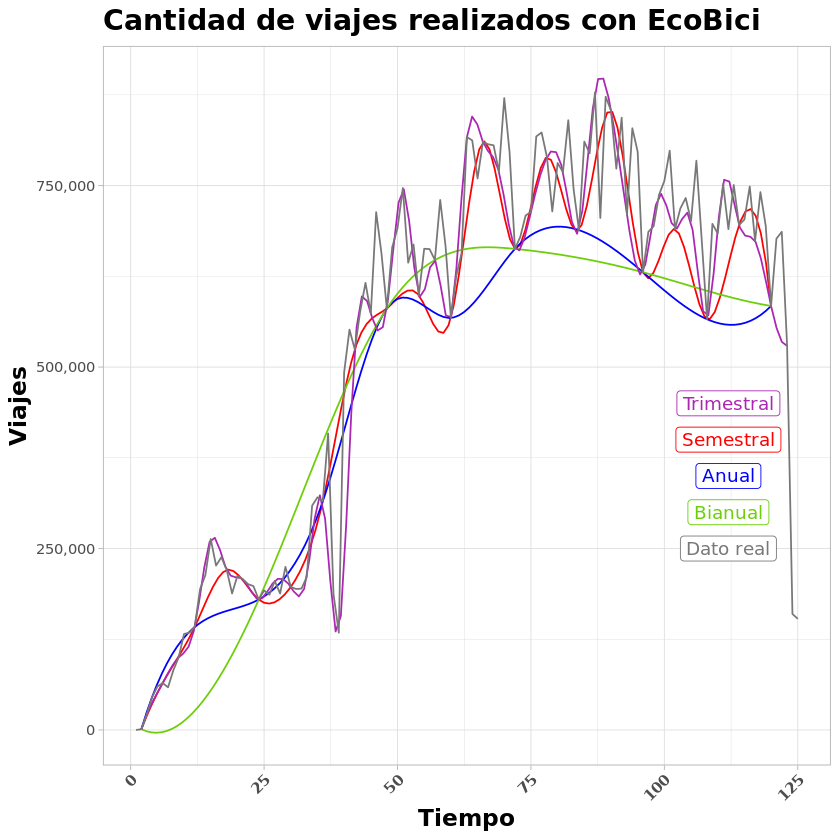

In [27]:
ggplot(data = data.frame(fecha = spl_sem$x, viajes = spl_sem$y), aes(fecha, viajes)) + 
    theme_light() +
    geom_line(color = "red") +
    geom_line(data = data.frame(fecha = spl_an$x, viajes = spl_an$y), color = "blue") +
    geom_line(data = data.frame(fecha = spl_bian$x, viajes = spl_bian$y), color = "#6DCE0A") +
    geom_line(data = data.frame(fecha = spl_trim$x, viajes = spl_trim$y), color = "#AB27B3") +
    geom_line(data = data.frame(fecha = new_data$time, viajes = new_data$viajes), color = "#787878") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"), 
          plot.title = element_text(size = 17, face = "bold"), 
          axis.title = element_text(size=14, face="bold")) + 
    annotate("label", x = 112, y = 450000, label = "Trimestral", color = "#AB27B3") +
    annotate("label", x = 112, y = 400000, label = "Semestral", color = "red") +
    annotate("label", x = 112, y = 350000, label = "Anual", color = "blue") +
    annotate("label", x = 112, y = 300000, label = "Bianual", color = "#6DCE0A") +
    annotate("label", x = 112, y = 250000, label = "Dato real", color = "#787878") +
    scale_y_continuous(labels = comma) +
    xlab("Tiempo") + 
    ylab("Viajes") +
    ggtitle("Cantidad de viajes realizados con EcoBici")

Nótese que todos los modelos de splines cúbicos logran captar la tendencia de la serie de tiempo, esto es: al inicio comienza a crecer y después se estabiliza hasta llegar al año $2020$, en donde comienza a decrecer. Se logra observar la "suavidad" que poseen los splines cúbicos al no dar cambios exageradamente bruscos entre los puntos, sino un comportamiento suave, sin embargo, no logra captar los altibajos que ocurren entre los puntos interpolados.

### Referencias
* [Splines cúbicos en `R`](https://astrostatistics.psu.edu/su07/R/html/stats/html/splinefun.html)

# Modelos $ARIMA$

In [28]:
install.packages("tseries")
install.packages("forecast")
install.packages("scales")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘urca’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("scales"):
“installation of package ‘scales’ had non-zero exit status”


In [29]:
library("ggplot2")
library("tseries")
library("forecast")
library("base")
library("scales")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



# Introducción

En el presente capítulo se realizará el análisis para la serie de tiempo cantidad de viajes realizados en la Ciudad de México utilizando las bicicletas del programa de gobierno *EcoBici*, en base a la metodología de los modelos $ARIMA$.



Los datos se encuentran presentes en cada una de las bases de datos, las cuales pueden obtenerse descargándolas desde la página oficial del programa [Ecobici](https://www.ecobici.cdmx.gob.mx/es/informacion-del-servicio/open-data). Los datos son mensuales y se cuenta con información desde febrero de $2010$  hasta mayo $2020$, por lo que se tiene un total de $124$ observaciones, las cuales representan la cantidad de viajes realizados en el respectivo mes y año.

# Objetivo

Pronosticar la cantidad de viajes realizados desde enero hasta mayo de $2020$ analizando la diferencia entre lo pronosticado y los datos reales dada la cuarentena originada por la pandemia de $COVID-19$.

# Metodología y análisis

### Lectura y preparación de datos

In [30]:
data <- read.csv("EcoBici.csv", stringsAsFactors = FALSE) ### No se desea que el anio sea un factor, lo queremos como string

In [31]:
head(data)

Anio    Viajes
1 2010-02  1057 
2 2010-03 21024 
3 2010-04 44984 
4 2010-05 59814 
5 2010-06 64704 
6 2010-07 58767

In [32]:
tail(data)

Anio    Viajes
119 2019-12 584185
120 2020-01 676908
121 2020-02 686327
122 2020-03 529077
123 2020-04 159780
124 2020-05 153147

Los últimos $5$ años deberían indicar $2020$ en la sección del año, a pesar de que indique $2010$.

In [33]:
data$Anio[120:124] <- gsub("2010", "2020", data$Anio[120:124])

Se prefiere trabajar con letras minúsculas, por lo que se cambiará la primera letra del nombre de cada columna a minúscula, además la primer columna `anio` no hace referencia al año únicamente, sino también al mes correspondiente, por lo que hará el cambio del nombre a `fecha`.

In [34]:
colnames(data) <- c("fecha", "viajes")

### Estructura de datos

In [35]:
summary(data)

    fecha               viajes      
 Length:124         Min.   :  1057  
 Class :character   1st Qu.:218704  
 Mode  :character   Median :665850  
                    Mean   :540405  
                    3rd Qu.:745155  
                    Max.   :878358  

In [36]:
str(data)

'data.frame':	124 obs. of  2 variables:
 $ fecha : chr  "2010-02" "2010-03" "2010-04" "2010-05" ...
 $ viajes: int  1057 21024 44984 59814 64704 58767 82329 100164 132294 134082 ...


Nótese que la variable `fecha` aparece como  `chr`, cuando en realidad debería ser un objeto `date` de `R`, a continuación se realizará el cambio correspondiente, para ello se supondrá que todos los meses tienen $28$ días, pues la función `as.Date`, presenta dificultades al tratar de identificar un mes que en tiene $28$ días (febrero) al momento de agregarle $30$ días o más.

In [37]:
data$fecha <- as.Date(paste0(data$fecha,"-28"))

In [38]:
data[which.min(data$viajes),]

fecha      viajes
1 2010-02-28 1057

In [39]:
data[which.max(data$viajes),]

fecha      viajes
86 2017-03-28 878358

* La cantidad menor de viajes fue de $1,057$ lo cual se obtuvo al inicio del programa, esto es, en febrero de $2010$.
* La cantidad mayor de viajes fue de $878,358$ obtenida el $2012-03$, esto es, en marzo de $2017$.

### Visualización de la serie de tiempo

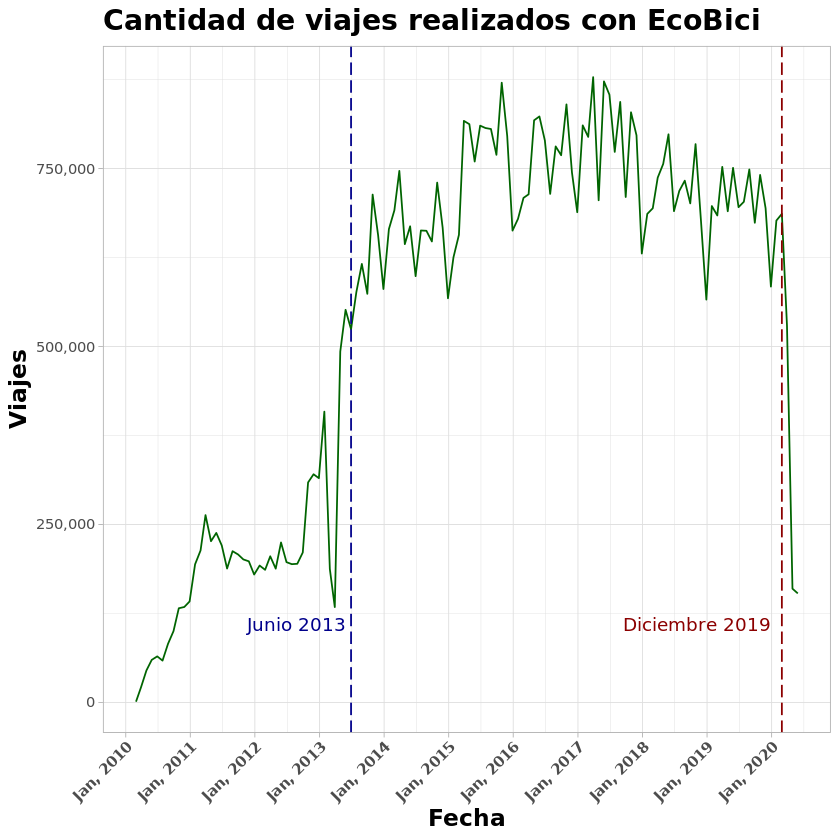

In [40]:
ggplot(data, aes(x = fecha, y = viajes)) + 
    theme_light() +
    geom_line(color = "darkgreen") + 
    scale_x_date(breaks='1 years', date_labels = "%b, %Y") + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"), 
          plot.title = element_text(size = 17, face = "bold"), 
          axis.title = element_text(size=14, face="bold")) + 
    scale_y_continuous(labels = comma) +
    geom_vline(xintercept = as.numeric(data$fecha[41]),
                linetype = 5, colour="darkblue") + 
    geom_vline(xintercept = as.numeric(data$fecha[121]),
                linetype = 5, colour="darkred") + 
    geom_text(data = data.frame(fecha = as.Date("2013-06-28"), 
                                box_cox = 110000), 
              aes(fecha, box_cox), label = "Junio 2013", hjust = 1.05, color = "darkblue") + 
    geom_text(data = data.frame(fecha = as.Date("2019-12-28"), 
                                box_cox = 110000), 
              aes(fecha, box_cox), label = "Diciembre 2019", hjust = 1, color = "darkred") + 
    xlab("Fecha") + 
    ylab("Viajes") +
    ggtitle("Cantidad de viajes realizados con EcoBici")

Al parecer la serie de tiempo comienza a estabilizarse a partir de junio de $2013$, esta fecha está marcada con una franja azul en el gráfico anterior, posteriormente tiene un decremento considerable en abril año $2020$, un mes después de que se decretó la pandemia originada por el $COVID-19$. 

Se tomarán todas las observaciones a excepción de aquellas del $2020$ y aquellas previas a junio $2013$, para obtener el modelo así como su respectiva estimación de parámetro y pruebas estadísticas necesarias. 

In [41]:
data_mod <- data[1:119,]

In [42]:
data_mod <- data_mod[-c(1:43),]

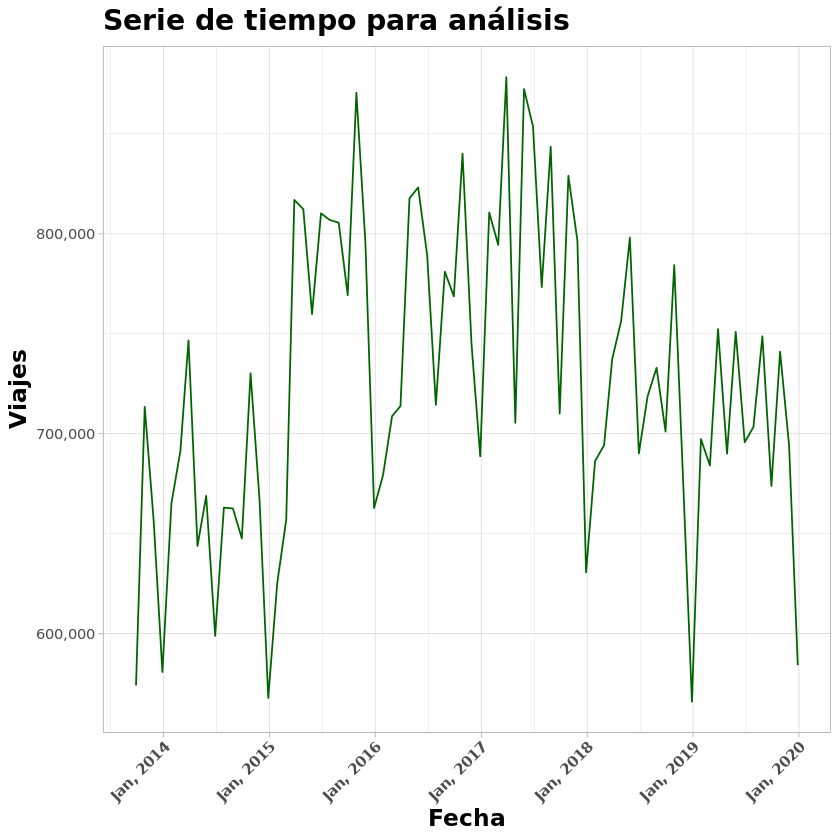

In [43]:
ggplot(data_mod, aes(x = fecha, y = viajes)) + 
    theme_light() +
    geom_line(color = "darkgreen") + 
    scale_x_date(breaks='1 years', date_labels = "%b, %Y") + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"), 
          plot.title = element_text(size = 17, face = "bold"), 
          axis.title = element_text(size=14, face="bold")) + 
    scale_y_continuous(labels = comma) +
    xlab("Fecha") + 
    ylab("Viajes") +
    ggtitle("Serie de tiempo para análisis")

### Grado de diferenciación $(d)$ y parámetro $\lambda$ para la estabilización de la varianza

Se utilizará la transformación $Box-Cox$ para la estabilización de la varianza.

In [44]:
lamb <- BoxCox.lambda(data_mod$viajes)
lamb

[1] 1.005101

Notemos que la transformación sugerida por la metodología de $Box-Cox$ es muy cercana a $1$, valor que equivale a dejar los datos tal y como se encuentran, es decir sin ninguna transformación. Se tomará el valor $\lambda = 1$, debido a la simplicidad.

In [45]:
lamb <- 1

In [46]:
tran_box <- function(xt,lamb){
    ### Calcula la transformación de Box - Cox
    # Input xt (vector): serie de tiempo a realizar transformación
    # Input (lamb): parámetro estabilizador de la varianza
    # Output (xt_box): serie de tiempo operada con la transformación
    
    if (lamb == 0) {
    xt_box <- log(xt)
    } else {
        xt_box <- (xt^lamb - 1)/lamb
    }
    return(xt_box)  
}

In [47]:
data_mod$box_cox <- tran_box(data_mod$viajes, lamb)

Visualizemos la serie de tiempo tras el proceso de estabilización de la varianza

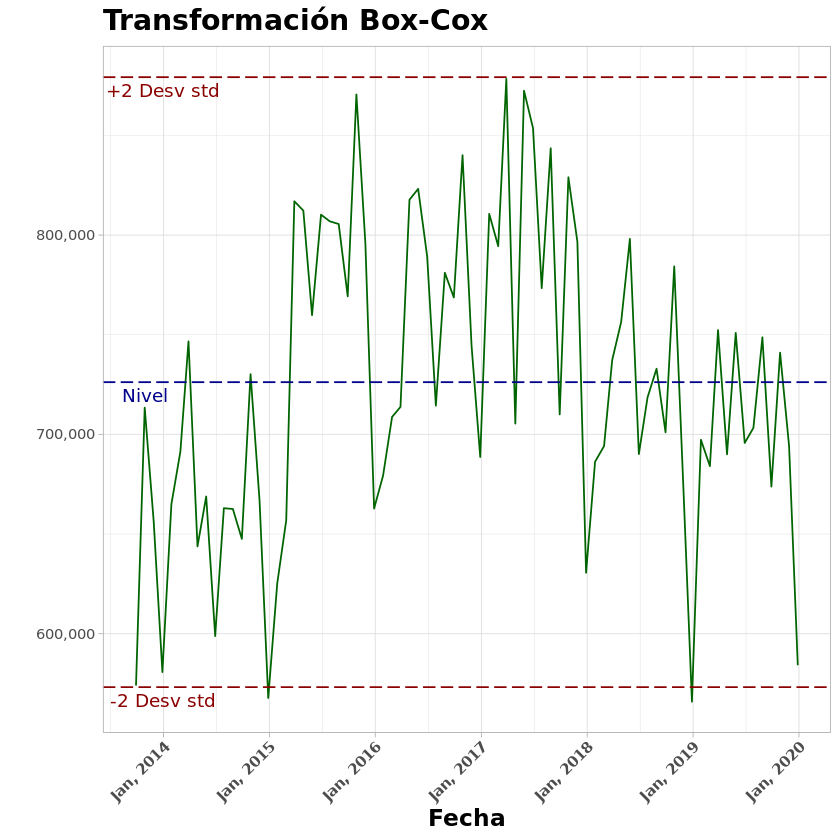

In [48]:
events <- data.frame(level = c((mean(data_mod$box_cox) + 2*sqrt(var(data_mod$box_cox))),
                              (mean(data_mod$box_cox) - 2*sqrt(var(data_mod$box_cox))),
                              mean(data_mod$box_cox)),
                     text = c(c("+2 Desv std", "Nivel", "-2 Desv std")))

ggplot(data_mod, aes(x = fecha, y = box_cox)) + 
    theme_light() +
    geom_line(color = "darkgreen") + 
    scale_x_date(breaks='1 years', date_labels = "%b, %Y") + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"), 
          plot.title = element_text(size = 17, face = "bold"), 
          axis.title = element_text(size=14, face="bold")) + 
    scale_y_continuous(labels = comma) +
    geom_hline(yintercept = (mean(data_mod$box_cox) + 2*sqrt(var(data_mod$box_cox))),
                linetype = 5, colour="darkred") + 
    geom_hline(yintercept = (mean(data_mod$box_cox) - 2*sqrt(var(data_mod$box_cox))),
                linetype = 5, colour="darkred") + 
    geom_hline(yintercept = mean(data_mod$box_cox),
                linetype = 5, colour="darkblue") + 
    xlab("Fecha") + 
    ylab("") +
    geom_text(data = data.frame(fecha = as.Date("2013-10-28"), 
                                box_cox = (mean(data_mod$box_cox) + 2*sqrt(var(data_mod$box_cox)))), 
              aes(fecha, box_cox), label = "      +2 Desv std", vjust = 1.5, color = "darkred") + 
    geom_text(data = data.frame(fecha = as.Date("2013-10-28"), 
                                box_cox = (mean(data_mod$box_cox) - 2*sqrt(var(data_mod$box_cox)))), 
              aes(fecha, box_cox), label = "      -2 Desv std", vjust = 1.5, color = "darkred") + 
    geom_text(data = data.frame(fecha = as.Date("2013-10-28"), 
                                box_cox = mean(data_mod$box_cox)), 
              aes(fecha, box_cox), label = "Nivel", vjust = 1.5, color = "darkblue") + 
    ggtitle("Transformación Box-Cox")

Nótese que parece ser que la serie de tiempo ya parece estar estabilizada, pues se encuentra dentro de las franjas rojas, las cuales marcan $2$ desviaciones estándares de los datos. Nótese que los datos se encuentran alrededor del nivel (media o promedio) marcado con la franja roja, mas hay un pequeño desajuste en los mismos para corregir esto se aplicará el una sola vez el operador diferencia $(\nabla)$.

Visualizemos la serie de tiempo con una diferencia $(d = 1)$.

In [50]:
st_d1 <- diff(data_mod$box_cox, 1)
data_d1 <- data.frame(fecha = data_mod$fecha[-1], st_d1 = st_d1)

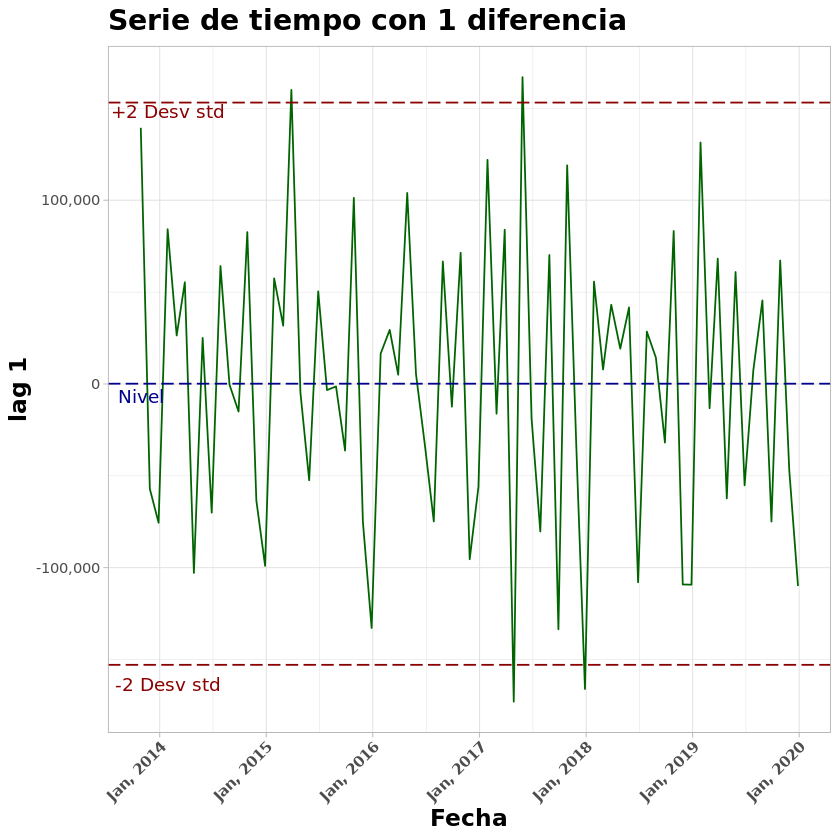

In [51]:
ggplot(data_d1, aes(x = fecha, y = st_d1)) + 
    theme_light() +
    geom_line(color = "darkgreen") + 
    scale_x_date(breaks='1 years', date_labels = "%b, %Y") + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"), 
          plot.title = element_text(size = 17, face = "bold"), 
          axis.title = element_text(size=14, face="bold")) + 
    scale_y_continuous(labels = comma) +
    geom_hline(yintercept = (mean(data_d1$st_d1) + 2*sqrt(var(data_mod$box_cox))),
                linetype = 5, colour="darkred") + 
    geom_hline(yintercept = (mean(data_d1$st_d1) - 2*sqrt(var(data_mod$box_cox))),
                linetype = 5, colour="darkred") + 
    geom_hline(yintercept = (mean(data_d1$st_d1)),
                linetype = 5, colour="darkblue") + 
    xlab("Fecha") + 
    ylab("lag 1") +
    geom_text(data = data.frame(fecha = as.Date("2013-10-28"), 
                                box_cox = (mean(data_d1$st_d1) + 2*sqrt(var(data_d1$st_d1)))), 
              aes(fecha, box_cox), label = "         +2 Desv std", vjust = 1.7, color = "darkred") + 
    geom_text(data = data.frame(fecha = as.Date("2013-10-28"), 
                                box_cox = (mean(data_d1$st_d1) - 2*sqrt(var(data_d1$st_d1)))), 
              aes(fecha, box_cox), label = "         -2 Desv std", vjust = 1.5, color = "darkred") + 
    geom_text(data = data.frame(fecha = as.Date("2013-10-28"), 
                                box_cox = mean(data_d1$st_d1)), 
              aes(fecha, box_cox), label = "Nivel", vjust = 1.5, color = "darkblue") + 
    ggtitle("Serie de tiempo con 1 diferencia")

Nótese que parece ser que el error ha sido corregido, para verificar esto se realizará la prueba de **Dickey-Fuller** con el objetivo de tener evidencia estadística de que el grado de diferenciación $d = 1$ es aceptable (nivel de significancia $\alpha = 0.05$).

In [52]:
adf.test(data_d1$st_d1, alternative = "stationary", k = 1)

Warning message in adf.test(data_d1$st_d1, alternative = "stationary", k = 1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data_d1$st_d1
Dickey-Fuller = -8.8647, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


Se rechaza la hipótesis nula, la cual es es, $H_0:$ la serie de tiempo no es estacionaria y se prosigue con el análisis.

In [54]:
adf.test(data_mod$box_cox, alternative = "stationary", k = 1)


	Augmented Dickey-Fuller Test

data:  data_mod$box_cox
Dickey-Fuller = -3.4596, Lag order = 1, p-value = 0.05249
alternative hypothesis: stationary


Al realizar la misma prueba estadística a la serie de tiempo sin diferenciar se llega a la conclusión de que la misma no es estacionaria, con lo cual concluímos que es necesario de una diferencia.

### Función de autocorrelación y función de autocorrelación

Para la elección de los grados de los polinomios autorregresivos $(AR)$ y de promedios móviles $(MA)$ se realizará el estudio de la función de autocorrelación y de autocorrelación parcial respectivamente.

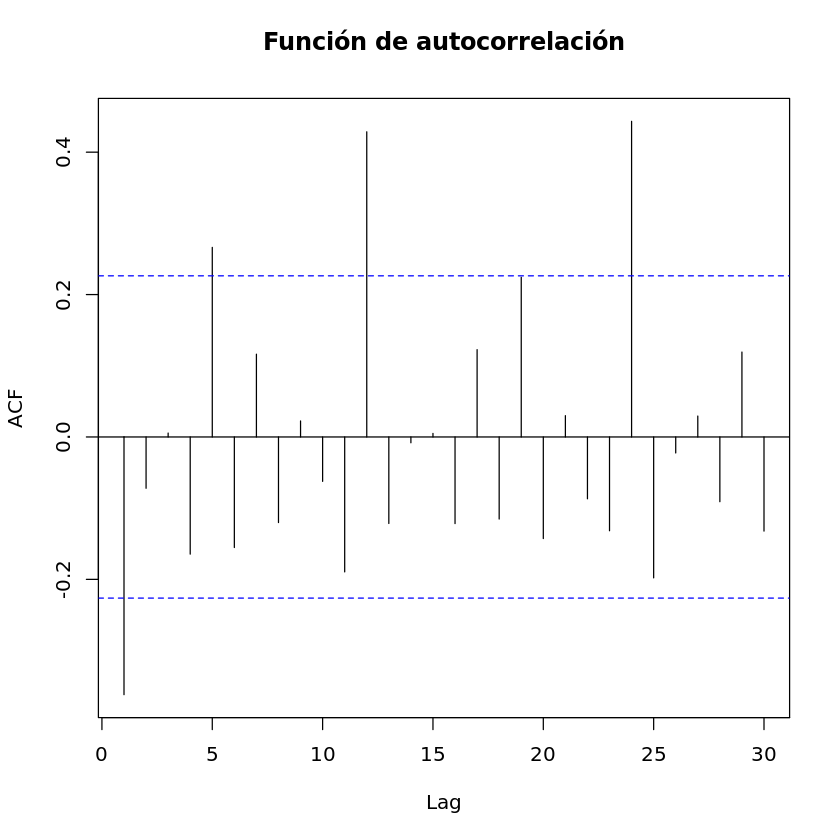

In [56]:
Acf(data_d1$st_d1, main='Función de autocorrelación', lag.max = 30)

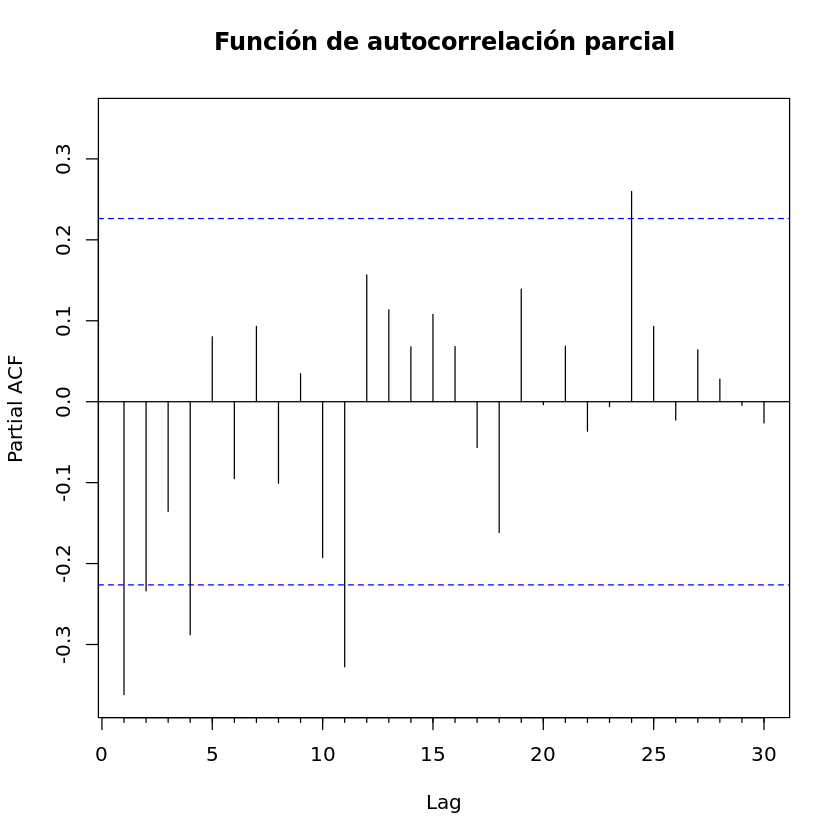

In [57]:
Pacf(data_d1$st_d1, main='Función de autocorrelación parcial', lag.max = 30)

La función de autocorrelación y la función de autocorrelaciónparcial sugieren elegir un modelo con parte estacional anual y con polinomios autorregresivos $(AR)$ y de promedios móviles $(MA)$ ambos de primer grado, debido a que la autocorrelación significativa (fuera de las bandas azules) para ambos gráficos correponde al $lag$ $\#12$, recordando que los datos son mensuales se  concluye que esto hace mención a un comportamiento anual.

### Modelos

El modelo a estimar es el siguiente:


* `mod_1` = $ARIMA(p = 1, d = 1, q = 0)x(P = 1, D = 1, Q = 0)_{E=12}$

In [58]:
mod_1 <- Arima(y = data_d1$st_d1,
               order = c(1, 0, 0), 
               seasonal = list(order = c(1, 1, 0), period = 12), lambda = lamb, biasadj = TRUE)

Los intervalos de confianza para los parámetros (coeficientes de los polinomios) estimados para `mod_1` son:

In [59]:
confint(mod_1)

2.5 %      97.5 %    
ar1  -0.6117450 -0.1578070
sar1 -0.7647864 -0.3972605

Nótese que los intervalos de confianza para los parámetros estimados no contienen el $0$ o son cercanos a este valor, esto es una **propiedad importante y deseable** para el análisis, pues en caso de que lo contuviera alguno de ellos, implica directamente que existe evidencia estadística para eliminar aglún polinomio o bien replantear el modelo.

### Pronósticos

Para la evaluación del modelo se hará el pronóstico de enero hasta mayo del $2020$, para ello se obtuvo el modelo con todas las observaciones excepto aquellas que hagan mención al $2020$, tal y como ya se había mencionado anteriormente.

In [60]:
fcast <- forecast(mod_1, h = 5)
fcast

   Point Forecast       Lo 80     Hi 80      Lo 95    Hi 95
76       74999.52   -591.5671 150590.60  -40607.07 190606.1
77        3801.50 -77192.2412  84795.24 -120067.74 127670.7
78       51776.89 -29986.3907 133540.18  -73269.26 176823.0
79      -14234.01 -96110.6101  67642.60 -139453.47 110985.5
80       49441.61 -32451.7589 131334.98  -75803.49 174686.7

Obsérvese que los intervalos de confianza al nivel $95\%$ toman valores negativos, lo cual podría pensarse que esto no tiene sentido en la vida real, pues no existen viajes negativos, sin embargo, no debe olvidarse que se está trabajando con la serie de tiempo transformada, pues se añadió un grado de diferenciación. A continuación se obtendrá el pronóstico para la serie de tiempo original.

In [61]:
pronostico <- c()
valor_real <- data$viajes[119:124]
for(i in 1:5){
    pronostico[i] <- fcast$mean[i] + valor_real[i]
}

In [62]:
valor_real <- data$viajes[120:124]
upper <- fcast$upper %>% 
    .[,2]
lower <- fcast$lower %>% 
    .[,2]
dif_up <- c()
dif_lo <- c()
new_up <- c()
new_lo <- c()

for(i in 1:5){
    dif_up[i] <- upper[i] - fcast$mean[i]
    dif_lo[i] <- fcast$mean[i] - lower[i] 
    new_up[i] <- pronostico[i] + dif_up[i]
    new_lo[i] <- pronostico[i] - dif_lo[i]
}

In [63]:
last_date <- data$fecha %>% 
                tail(5)
forecast_ts <- data.frame(fecha = rep(last_date, 2),
                          value = c(valor_real, pronostico),
                          Up_CI = c(valor_real, new_up),
                          Lo_CI = c(valor_real, new_lo),
                          Valor = c(rep("Original", 5), rep("Pronostico", 5)))

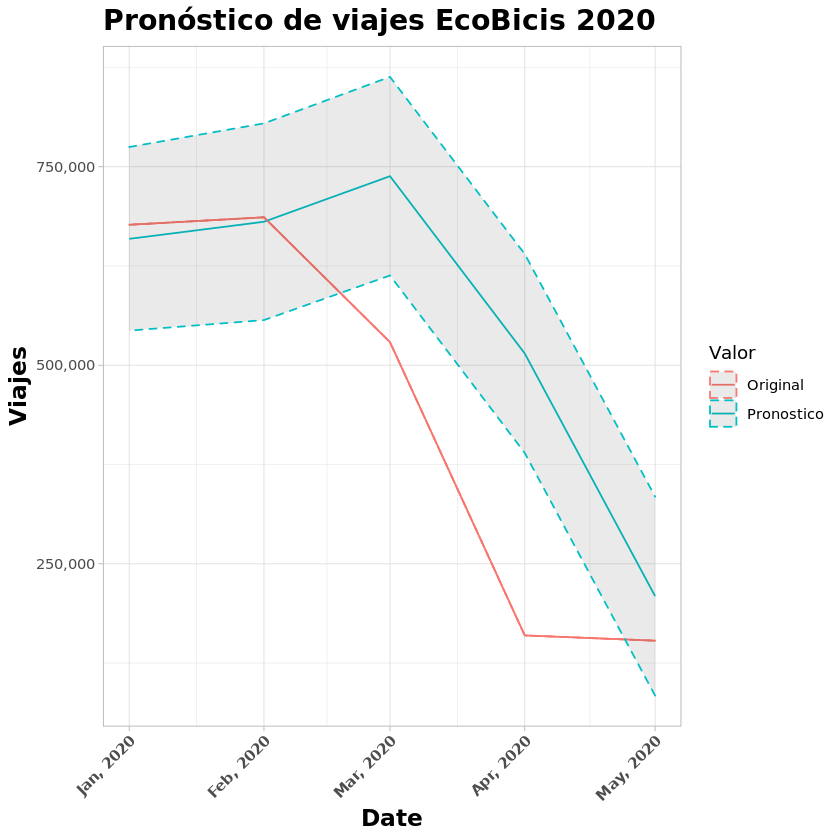

In [64]:
ggplot(forecast_ts, aes(x = fecha, y = value, color = Valor)) + 
    theme_light() +
    scale_x_date("Date", breaks = seq(min(forecast_ts$fecha), max(forecast_ts$fecha), by = "month"), 
                 date_labels = "%b, %Y") +
    geom_line() + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"), 
          plot.title = element_text(size = 17, face = "bold"), 
          axis.title = element_text(size=14, face="bold")) + 
    scale_y_continuous(labels = comma) +
    xlab("Fecha") + 
    ylab("Viajes") +
    ggtitle("Pronóstico de viajes EcoBicis 2020") +
    geom_ribbon(aes(ymin = Lo_CI, ymax = Up_CI), linetype=2, alpha=0.1)

### Error cuadrático medio $(ECM)$ y error relativo

Por último se calculará tanto el error cuadrático medio como el error relativo para analizar los pronósticos obtenidos.

In [65]:
relative_error <- function(x, y){
    ### Calcula el error relativo
    # Input x (float): valor real
    # Input y (float): pronostico o aproximación
    # Output rdo (float): error relativo entre x, y
    
    rdo <- (abs(x-y)/x) 
    return(rdo)
}

In [66]:
ecm <- function(x, y){
    ### Calcula el error cuadrático medio
    # Input x (vector): valor real
    # Input y (vector): pronostico o aproximación
    # Output rdo (float): error cuadrático medio entre x, y; o bien regresa string de error en caso de que las dimensiones 
    #                     no sean las mismas
    
    n <- length(x)
    m <- length(y)
    if(n == m){
        rdo <- sum((x-y)^2/x)
    }else{
        rdo <- "Las dimensiones entre los datos debe ser la misma"
    }
    return(rdo)
}

In [69]:
fc_df <- forecast_ts[6:10,-5]
fc_df$real <- data$viajes[120:124]
fc_df$error_relativo <- relative_error(fc_df$real, fc_df$value)
df_df <- fc_df[,c(1, 2, 5, 6, 3, 4)]
pander::pander(fc_df)



| &nbsp; |   fecha    | value  | Up_CI  | Lo_CI  |  real  | error_relativo |
|:------:|:----------:|:------:|:------:|:------:|:------:|:--------------:|
| **6**  | 2020-01-28 | 659185 | 774791 | 543578 | 676908 |    0.02618     |
| **7**  | 2020-02-28 | 680710 | 804579 | 556840 | 686327 |    0.008185    |
| **8**  | 2020-03-28 | 738104 | 863150 | 613058 | 529077 |     0.3951     |
| **9**  | 2020-04-28 | 514843 | 640062 | 389624 | 159780 |     2.222      |
| **10** | 2020-05-28 | 209222 | 334467 | 83977  | 153147 |     0.3661     |



El error relativo es muy pequeño para enero, febrero y mayo, poniendo en contexto al lector, estas fechas fueron menos afectadas por la cuarentena, para el caso de enero y febrero, aún no se decretaba la cuarentana originada por la pandemia, para el caso de mayo, fue cuando varios negocios de la Ciudad de México reabrieron sus operaciones. 

El error cuadrático medio es:

In [70]:
ecm(valor_real, pronostico)

[1] 892644.4

### Conclusiones

* Los splines cúbicos presentan un buen desempeño, pues ajusta de manera aceptable (a a slimple vista) la serie de puntos interpolados, sin embargo, no es un modelo que presente un excelente desempeño.
* A medida que disminuyen los puntos para obtener los coeficientes del polinomio el error cuadrático medio incrementa casi de manera considerable.
* El error relativo es muy pequeño para enero, febrero y mayo, poniendo en contexto al lector, estas fechas fueron menos afectadas por la cuarentena, para el caso de enero y febrero, aún no se decretaba la cuarentana originada por la pandemia, para el caso de mayo, fue cuando varios negocios de la Ciudad de México reabrieron sus operaciones. 
* Los pronósticos en para marzo y abril demasiado, pues las métrica de error relativo es demasiado alta, esto se debe a que el modelo sobreestimó la cantidad de viajes realizados en marzo y abril, las cuales fueron las fechas donde la cuarentena alcanzó sus niveles de mayor cuidado en relación a las demás fechas.
* Se muestra perfectamente que un evento catastrófico puede alterar demasiado los modelos $ARIMA$, pues no son entrenados con información relacionada a un evento similar al que ocurrió en este caso, en caso de que hubiese ocurrido uno similar, podría calibrarse el modelo contemplando dicha información.

### Referencias

* [Splines cúbicos en `R`](https://astrostatistics.psu.edu/su07/R/html/stats/html/splinefun.html)
* Guerrero, V. M., (2014). *Análisis estadístico y pronóstico de series de tiempo económicas*, México DF, México: Jit Press.
* [Pronósticos de series de tiempo con modelos ARIMA en `R`](https://rpubs.com/riazakhan94/arima_with_example)
* [Transformación Box-Cox](http://betaeconomia.blogspot.com/2019/11/transformaciones-de-series-temporales.html)
* [Prueba de Dickey-Fuller](https://nwfsc-timeseries.github.io/atsa-labs/sec-boxjenkins-aug-dickey-fuller.html)